In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
yılsonu=pd.DataFrame()
yılsonu["Tahmin"]=[44.51,46,46.77,47.51,44.12,45.83,43.85,42.7,43.68,42.38,45.20]
yılsonu=yılsonu.set_index(pd.date_range(start="2023-12-31",freq="M",periods=len(yılsonu)))
yılsonu

,Tahmin
2023-12-31,44.51
2024-01-31,46.00
2024-02-29,46.77
2024-03-31,47.51
2024-04-30,44.12
2024-05-31,45.83
2024-06-30,43.85
2024-07-31,42.70
2024-08-31,43.68
2024-09-30,42.38


In [3]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [4]:
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME','Tarih'])
    seri.columns = [f"{series_code}"]
    seri[f"{series_code}"] = pd.to_numeric(seri[f"{series_code}"])

    seri=seri.set_index(pd.date_range(start=params["startDate"],freq="M",periods=len(seri)))

        
    seri=seri.dropna()

    return seri

In [5]:
import yfinance as yf 


In [6]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd=usd.dropna()
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-07-31,32.894495
2024-08-31,33.621248
2024-09-30,34.030467
2024-10-31,34.232582


In [7]:
euro=evds_vericek("TP.DK.EUR.S.YTL",5)

In [8]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-06-30,2319.29
2024-07-31,2394.10
2024-08-31,2453.34
2024-09-30,2526.16


In [9]:
yıllık=enf.pct_change(12)*100

In [10]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2024-07-31,2.420054
2024-08-31,3.839603
2024-09-30,1.803745
2024-10-31,0.688774


In [11]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-07-31,3.443050
2024-08-31,4.341284
2024-09-30,2.815464


In [12]:
params = {
    'series': "TP.PR.ARZ01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m1 = formatted_response['items']
m1 = pd.DataFrame(m1)


m1 = m1.drop(columns=['UNIXTIME','YEARWEEK'])
m1.columns = ['Tarih','M1']
m1['M1'] = pd.to_numeric(m1['M1'])
m1 = m1.set_index(pd.to_datetime(m1["Tarih"], format="%d-%m-%Y"))
del m1["Tarih"]
m1=m1.pct_change(4)*100
m1=m1.resample('M').last()
m1=m1.dropna()
m1

,M1
Tarih,
2006-02-28,4.504977
2006-03-31,5.085533
2006-04-30,3.473587
2006-05-31,10.905356
2006-06-30,-0.497357
...,...
2024-07-31,0.082923
2024-08-31,7.064625
2024-09-30,2.047908


In [13]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2024-05-31,8.5
2024-06-30,9.2
2024-07-31,8.8
2024-08-31,8.6


In [14]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-07-31,83.717727
2024-08-31,78.875001
2024-09-30,72.638499


In [15]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-07-31,1.391053
2024-08-31,3.273182
2024-09-30,2.186080


In [16]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-07-31,50.000000
2024-08-31,50.337619
2024-09-30,50.719048
2024-10-31,50.000000


In [17]:
motorin=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
motorin=motorin.iloc[-1,:]
motorin=pd.DataFrame(motorin[3:])
motorin=motorin.set_index(pd.date_range(start="2005-01-31",periods=len(motorin),freq="M"))
motorin.columns=["Motorin"]
motorin

,Motorin
2005-01-31,1.75
2005-02-28,1.78
2005-03-31,1.87
2005-04-30,1.94
2005-05-31,1.88
...,...
2024-06-30,41.4054
2024-07-31,45.1811
2024-08-31,44.2551
2024-09-30,42.8018


In [18]:
dogalgaz=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
dogalgaz=dogalgaz.iloc[-5,:]
dogalgaz=pd.DataFrame(dogalgaz[3:])
dogalgaz=dogalgaz.set_index(pd.date_range(start="2005-01-31",periods=len(dogalgaz),freq="M"))
dogalgaz.columns=["Doğalgaz"]

In [19]:
elektrik=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
elektrik=elektrik.iloc[-6,:]
elektrik=pd.DataFrame(elektrik[3:])
elektrik=elektrik.set_index(pd.date_range(start="2005-01-31",periods=len(elektrik),freq="M"))
elektrik.columns=["Elektrik"]

In [20]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-07-31,59.382500
2024-08-31,59.024000
2024-09-30,59.677500
2024-10-31,59.497500


In [21]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-07-31,0.60
2024-08-31,0.49
2024-09-30,0.36
2024-10-31,0.37


In [22]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2024-06-30,3.420697
2024-07-31,4.207686
2024-08-31,1.727957
2024-09-30,3.902521


In [23]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2024-06-30,3.760332
2024-07-31,1.727271
2024-08-31,2.453794
2024-09-30,2.992452


In [24]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2024-06-30,1.376326
2024-07-31,1.941578
2024-08-31,1.679302
2024-09-30,1.366289


In [25]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2024-05-31,-14.801184
2024-06-30,25.277911
2024-07-31,-21.290838
2024-08-31,18.175141


In [26]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2024-05-31,-2.561016
2024-06-30,5.014569
2024-07-31,-18.742041
2024-08-31,19.590449


In [27]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2024-07-31,2.77
2024-08-31,2.55
2024-09-30,2.22
2024-10-31,2.39


In [28]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"]
data["EUR"]=euro["TP.DK.EUR.S.YTL"]
data["Sepet1"]=(data["USD/TL"]*0.5+data["EUR"]*0.5)
data["USD/TL"]=data["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["Motorin1"]=motorin["Motorin"].shift(1)
data["Motorin2"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data["Doğalgaz"]=dogalgaz["Doğalgaz"]
data["Elektrik"]=elektrik["Elektrik"]
data=data.pct_change()*100
#data["Yıllık"]=yıllık["TÜFE"].shift(1)
data["M3"]=m3["M3"].rolling(3).mean()
data["ÜFEt1"]=üfe["ÜFE"].shift(1)
data["ÜFEt2"]=üfe["ÜFE"].shift(2)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,EUR,Sepet1,Motorin,Motorin1,Motorin2,TÜFE,TÜFEt-1,Doğalgaz,Elektrik,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,NaN,NaN,0.000000,1.485149,0.000000,0.218500,NaN,-2.040816,0.000000,NaN,NaN,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,NaN,NaN,0.975610,0.000000,0.975610,0.274548,0.218500,6.250000,0.000000,NaN,0.256616,NaN,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,NaN,NaN,2.898551,0.975610,2.898551,1.336769,0.274548,0.000000,0.000000,2.079935,0.247960,0.256616,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,NaN,NaN,4.694836,2.898551,4.694836,1.875397,1.336769,1.960784,0.000000,4.447765,1.938881,0.247960,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,0.581912,1.700325,1.434353,9.118859,0.290660,9.118859,3.225556,1.640774,2.601950,37.997137,3.572995,1.376326,1.957875,1.727271,3.760332,4.207686,-21.290838,-18.742041,2.77
2024-08-31,1.406221,3.738728,3.004676,-2.049530,9.118859,-2.049530,2.474416,3.225556,27.847077,0.000000,3.830077,1.941578,1.376326,2.453794,1.727271,1.727957,18.175141,19.590449,2.55
2024-09-30,1.523907,2.190676,1.727022,-3.283915,-2.049530,-3.283915,2.968198,2.474416,0.638570,0.000000,3.533266,1.679302,1.941578,2.992452,2.453794,3.902521,-2.019629,-9.327567,2.22
2024-10-31,1.330817,-1.011805,-0.250895,1.424473,-3.283915,1.424473,2.879865,2.968198,0.569351,0.000000,2.912468,1.366289,1.679302,3.573309,2.992452,3.644305,NaN,NaN,2.39


In [29]:
data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].rolling(3).mean()
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam',"Doğalgaz","Elektrik",'Motorin1','Motorin2','TÜFEt-1','ParaArzi','Kredi','İhracat','İthalat','Mevduat Faizi','Anket','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO',"Sepet1",'TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data["İşsizlik"].iloc[-2:]=issizlik.iloc[-1,0]


data=data.loc["2014-01-31":"2024-11-30"]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["ÜFEt1"].iloc[-1]=1.29
data["ÜFEt2"].iloc[-2:]=[1.68,1.37]
data["TÜFECt1"].iloc[-1]=2.79
data["TÜFECt2"].iloc[-1]=3.57
data["İhracat"].iloc[-2:]=[-0.25387,7.32]
data["İthalat"].iloc[-2:]=[0.5128,8.23]
data["Enflasyon Belirsizliği"].iloc[-1]=0.35
#data["Yıllık"].iloc[-1]=yıllık.iloc[-1,0]
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,Doğalgaz,Elektrik,Motorin1,Motorin2,TÜFEt-1,...,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,Sepet1,TÜFE
2014-01-31,3.732429,2.881984,2.086700,0.37,5.265777,0.065445,-0.223152,1.603103,2.881984,0.460607,...,1.06,9.2,7.503636,0.618013,0.625859,1.106494,-0.111246,0.333618,7.435486,1.978080
2014-02-28,3.033477,1.685899,1.867150,0.31,0.000000,0.280295,0.000000,2.881984,1.685899,1.978080,...,0.69,9.5,10.070500,1.106494,-0.111246,3.319203,0.308798,1.009554,-0.118586,0.428192
2014-03-31,2.465778,-2.278097,0.972739,0.16,0.000000,0.428585,0.000000,1.685899,-2.278097,0.428192,...,0.65,9.5,10.200952,3.319203,0.308798,1.383675,0.701489,0.989257,0.982348,1.125608
2014-04-30,-1.344724,-6.214384,0.288775,0.23,0.000000,0.055664,0.307520,-2.278097,-6.214384,1.125608,...,0.76,9.7,10.046190,1.383675,0.701489,0.736212,1.197755,2.649799,-4.123169,1.344970
2014-05-31,-1.859714,-0.561578,0.043893,0.26,0.000000,-0.009272,0.000000,-6.214384,-0.561578,1.344970,...,0.63,9.7,9.891000,0.736212,1.197755,0.085477,2.119546,0.211698,-1.982876,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,0.581912,9.118859,3.572995,0.60,0.000000,2.601950,37.997137,0.290660,9.118859,1.640774,...,2.77,8.8,50.000000,1.957875,3.760332,1.376326,1.727271,4.207686,1.434353,3.225556
2024-08-31,1.406221,-2.049530,3.830077,0.49,0.000000,27.847077,0.000000,9.118859,-2.049530,3.225556,...,2.55,8.6,50.337619,1.376326,1.727271,1.941578,2.453794,1.727957,3.004676,2.474416
2024-09-30,1.523907,-3.283915,3.533266,0.36,0.000000,0.638570,0.000000,-2.049530,-3.283915,2.474416,...,2.22,8.6,50.719048,1.941578,2.453794,1.679302,2.992452,3.902521,1.727022,2.968198
2024-10-31,1.330817,1.424473,2.912468,0.37,0.000000,0.569351,0.000000,-3.283915,1.424473,2.968198,...,2.39,8.6,50.000000,1.680000,2.992452,1.366289,3.573309,3.644305,-0.250895,2.879865


In [30]:


data["Motorin"].iloc[-1]=0.5648
data["Motorin2"].iloc[-1]=0.5648

In [31]:
new_date = pd.Timestamp('2024-11-30')
new_value = 1.2501
kredi.loc[new_date] = new_value


In [32]:
data["Motorin"]=data["Motorin"].rolling(2).mean()
data["Kredi"]=kredi["Kredi"].shift(1).rolling(2).mean()
data["Kredi2"]=kredi["Kredi"].rolling(3).mean()

In [33]:
new_date = pd.Timestamp('2024-11-30')
new_value = 1.4444
money.loc[new_date] = new_value

In [34]:
data["ParaArzi"].iloc[-1]=money.rolling(3).mean().iloc[-1].values[0]

In [35]:
new_date = pd.Timestamp('2024-11-30')
new_value = 1.2817
m3.loc[new_date] = new_value

In [36]:
data["M3"].iloc[-1]=m3.rolling(3).mean().iloc[-1].values[0]



## Cari Ay Enflasyon Tahmini

In [37]:
data=data.dropna()

In [38]:
from sklearn.model_selection import train_test_split
features=['USD/TL',"Sepet1", 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-8,:],X.iloc[-8:,:]
y_train,y_test=y[:-8],y[-8:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [39]:
features=['USD/TL',"Sepet1", 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Sepet1,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,Elektrik,TÜFEt-1,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.246927,-0.481379,0.047793,0.122745,-0.039537,-0.281324,-0.547359,-0.283969,-0.209013,0.030842,...,-1.380674,-0.663725,-0.665140,-0.959063,-0.565058,-0.383443,-0.912475,0.371987,-0.726327,-0.668846
1,0.074456,-0.245194,-0.364007,-0.040467,-0.580539,-0.809575,-0.935205,-0.283969,-0.209013,-0.666339,...,-0.653826,-0.615380,-0.695192,-0.959063,-0.553702,0.372396,-0.713995,-0.289280,-0.540318,-0.355418
2,-1.083201,-1.340486,-0.994490,-0.581375,-1.117759,-1.213532,-0.754210,-0.283969,-0.170280,-0.352623,...,1.092703,-0.636024,-0.612548,-0.829527,-0.567174,-0.288761,-0.528441,-0.510483,-0.305248,-0.256833
3,-1.239658,-0.881327,-0.857503,-1.118502,-0.346270,-1.358163,-0.676641,-0.283969,-0.209013,-0.253948,...,-0.013427,-0.673147,-0.710219,-0.829527,-0.580683,-0.509928,-0.293945,-0.732805,0.131384,-0.683663
4,-1.156445,-0.342719,-0.142125,-0.347147,0.105647,-0.966934,-0.521503,-0.283969,-0.209013,-0.681169,...,-0.049885,-0.702542,-1.018255,-0.829527,-0.620937,-0.732212,0.141620,-0.939994,-0.160508,-0.721608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.497875,-0.148225,0.434180,-0.230855,0.974905,0.726169,0.202475,-0.283969,4.576803,-0.120887,...,-1.747012,2.777251,0.897584,-1.412438,2.910768,-0.092620,0.916925,-0.291791,-0.054428,0.588329
126,-0.247445,0.188658,0.247421,0.973799,-0.549344,0.878005,-0.081945,-0.283969,-0.209013,0.591990,...,1.677627,2.751949,0.732295,-1.541973,2.940157,-0.291271,-0.043738,-0.098674,0.289710,0.250756
127,-0.211691,-0.085439,-0.742383,-0.550186,-0.717812,0.702705,-0.418077,-0.283969,-0.209013,0.254107,...,-0.905919,2.798071,0.484363,-1.541973,2.973360,-0.098187,0.299559,-0.188280,0.544860,0.472669
128,-0.270353,-0.509763,-0.465140,-0.718624,-0.075216,0.336054,-0.392221,-0.283969,-0.209013,0.476223,...,-0.026777,2.785367,0.612086,-1.541973,2.910768,-0.187539,0.554087,-0.295220,0.819999,0.432971


In [40]:
features=['USD/TL',"Sepet1", 'Motorin','Motorin1','Motorin2', 'M3', 'Enflasyon Belirsizliği', 'Zam','Elektrik', 'TÜFEt-1',
       'ParaArzi', 'Kredi','Kredi2', 'İhracat', 'İthalat', 'Mevduat Faizi', 'Anket',
       'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Sepet1,Motorin,Motorin1,Motorin2,M3,Enflasyon Belirsizliği,Zam,Elektrik,TÜFEt-1,...,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.246927,-0.481379,0.047793,0.122745,-0.039537,-0.281324,-0.547359,-0.283969,-0.209013,0.030842,...,-1.380674,-0.663725,-0.665140,-0.959063,-0.565058,-0.383443,-0.912475,0.371987,-0.726327,-0.668846
1,0.074456,-0.245194,-0.364007,-0.040467,-0.580539,-0.809575,-0.935205,-0.283969,-0.209013,-0.666339,...,-0.653826,-0.615380,-0.695192,-0.959063,-0.553702,0.372396,-0.713995,-0.289280,-0.540318,-0.355418
2,-1.083201,-1.340486,-0.994490,-0.581375,-1.117759,-1.213532,-0.754210,-0.283969,-0.170280,-0.352623,...,1.092703,-0.636024,-0.612548,-0.829527,-0.567174,-0.288761,-0.528441,-0.510483,-0.305248,-0.256833
3,-1.239658,-0.881327,-0.857503,-1.118502,-0.346270,-1.358163,-0.676641,-0.283969,-0.209013,-0.253948,...,-0.013427,-0.673147,-0.710219,-0.829527,-0.580683,-0.509928,-0.293945,-0.732805,0.131384,-0.683663
4,-1.156445,-0.342719,-0.142125,-0.347147,0.105647,-0.966934,-0.521503,-0.283969,-0.209013,-0.681169,...,-0.049885,-0.702542,-1.018255,-0.829527,-0.620937,-0.732212,0.141620,-0.939994,-0.160508,-0.721608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.497875,-0.148225,0.434180,-0.230855,0.974905,0.726169,0.202475,-0.283969,4.576803,-0.120887,...,-1.747012,2.777251,0.897584,-1.412438,2.910768,-0.092620,0.916925,-0.291791,-0.054428,0.588329
126,-0.247445,0.188658,0.247421,0.973799,-0.549344,0.878005,-0.081945,-0.283969,-0.209013,0.591990,...,1.677627,2.751949,0.732295,-1.541973,2.940157,-0.291271,-0.043738,-0.098674,0.289710,0.250756
127,-0.211691,-0.085439,-0.742383,-0.550186,-0.717812,0.702705,-0.418077,-0.283969,-0.209013,0.254107,...,-0.905919,2.798071,0.484363,-1.541973,2.973360,-0.098187,0.299559,-0.188280,0.544860,0.472669
128,-0.270353,-0.509763,-0.465140,-0.718624,-0.075216,0.336054,-0.392221,-0.283969,-0.209013,0.476223,...,-0.026777,2.785367,0.612086,-1.541973,2.910768,-0.187539,0.554087,-0.295220,0.819999,0.432971


In [41]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
from sklearn.model_selection import TimeSeriesSplit

# Listeyi tanımlayın
best_predictions = []

def objective(trial):
    keras.utils.set_random_seed(42)
   
    selected_features=["Sepet1","M3","Motorin2","ParaArzi","Kredi","TÜFECt2","TÜFECt1"]
    X=scaled_data[selected_features]










    

   
    y = scaled_data["TÜFE"]
    
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])
    
    X_train, X_test = X.iloc[:-10, :], X.iloc[-10:, :]
    y_train, y_test = y[:-10], y[-10:]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
    X_train,X_val=X_train.sort_index(),X_val.sort_index()
    y_train,y_val=y_train.sort_index(),y_val.sort_index()
    
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 512)
    batch_size = trial.suggest_int('batch_size', 2, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh', 'selu', 'relu', 'linear', 'sigmoid'])
    rlrate = trial.suggest_float('rlrate', 0.001, 0.999)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    keras.utils.set_random_seed(42)
    model = Sequential()
    model.add(Dense(units=units1, activation=activation1, input_dim=X_train.shape[1]))
    model.add(Dropout(rlrate))
    model.add(Dense(units=1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size, callbacks=[early_stopping], verbose=0, validation_data=(X_val, y_val))
    
    y_pred = model.predict(X_test)
    
    tahminler = pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns = ["TÜFE"]
    tahminler["Tahmin"] = scaler2.inverse_transform(y_pred)
    tahminler = tahminler.set_index(data.index[-10:])
    tahminler["Tahmin"].loc["2024-05-31"] += 0.66
    
    mse = mean_squared_error(tahminler["TÜFE"].iloc[:-1], tahminler["Tahmin"].iloc[:-1])
    print(tahminler["Tahmin"].iloc[-1])
    

    
    return mse



"""study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)
"""


"study = optuna.create_study(direction='minimize')\nstudy.optimize(objective, n_trials=500)\n"

In [42]:
hata=[]

In [43]:
from sklearn.model_selection import train_test_split

In [71]:
"""selected_features = ['USD/TL', 'Motorin','M3','Enflasyon Belirsizliği','Motorin2','ParaArzi','Kredi','İthalat','ÜFEt2','TÜFECt1','Yıllık']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=167,activation="relu",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.10390454177547626))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0734062120239888)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=117,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-9:])"""

'selected_features = [\'USD/TL\', \'Motorin\',\'M3\',\'Enflasyon Belirsizliği\',\'Motorin2\',\'ParaArzi\',\'Kredi\',\'İthalat\',\'ÜFEt2\',\'TÜFECt1\',\'Yıllık\']\nX=scaled_data[selected_features]\ny=scaled_data["TÜFE"]\nX=np.array(X)\ny=np.array(y).reshape(-1,1)\nX=pd.DataFrame(X,columns=selected_features)\ny=pd.DataFrame(y,columns=["TÜFE"])\nX_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]\ny_train,y_test=y[:-9],y[-9:]\nX_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)\nkeras.utils.set_random_seed(42)\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=0, restore_best_weights=True)\nmodel2 = Sequential()   \nmodel2.add(Dense(units=167,activation="relu",input_dim=(X_train.shape[1])))\nmodel2.add(Dropout(0.10390454177547626))\nmodel2.add(Dense(units=1))\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.0734062120239888)\nmodel2.compile(optimizer=optimizer, loss=\'mse\', metrics=[\'mean_squared_error\'])\nhistory=model2.fit(X_train, y_tr

In [72]:
"""tahminler["NN"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])"""

'tahminler["NN"].loc["2024-05-31"]+=0.66\nmean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])'

In [73]:
"""selected_features = ['USD/TL', 'Motorin', 'M3','Enflasyon Belirsizliği','Motorin2','ParaArzi', 'Kredi','İthalat','ÜFEt2','TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=166,activation="relu",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.23817649031745353))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.07082440960102175)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=115,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-9:])

import numpy as np
import pandas as pd



"""

'selected_features = [\'USD/TL\', \'Motorin\', \'M3\',\'Enflasyon Belirsizliği\',\'Motorin2\',\'ParaArzi\', \'Kredi\',\'İthalat\',\'ÜFEt2\',\'TÜFECt1\']\nX=scaled_data[selected_features]\ny=scaled_data["TÜFE"]\nX=np.array(X)\ny=np.array(y).reshape(-1,1)\nX=pd.DataFrame(X,columns=selected_features)\ny=pd.DataFrame(y,columns=["TÜFE"])\nX_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]\ny_train,y_test=y[:-9],y[-9:]\nX_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)\nkeras.utils.set_random_seed(42)\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=0, restore_best_weights=True)\nmodel2 = Sequential()   \nmodel2.add(Dense(units=166,activation="relu",input_dim=(X_train.shape[1])))\nmodel2.add(Dropout(0.23817649031745353))\nmodel2.add(Dense(units=1))\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.07082440960102175)\nmodel2.compile(optimizer=optimizer, loss=\'mse\', metrics=[\'mean_squared_error\'])\nhistory=model2.fit(X_train, y_train, epo

In [74]:
"""tahminler["NN"].loc["2024-05-31"]+=0.66
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])"""

'tahminler["NN"].loc["2024-05-31"]+=0.66\nmean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN"].iloc[:-1])'

In [44]:
selected_features = ['Sepet1', 'Motorin2', 'ParaArzi', 'Kredi2','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=253,activation="tanh",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.539206))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.058346)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=119,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.6191 - mean_squared_error: 1.6191 - val_loss: 16.5985 - val_mean_squared_error: 16.5985
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 32.1907 - mean_squared_error: 32.1907 - val_loss: 0.6957 - val_mean_squared_error: 0.6957
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9525 - mean_squared_error: 0.9525 - val_loss: 9.3471 - val_mean_squared_error: 9.3471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


,TÜFE,NN5
2024-02-29,4.529188,4.311315
2024-03-31,3.162671,2.953233
2024-04-30,3.179759,2.735214
2024-05-31,3.368063,3.532220
2024-06-30,1.640774,2.304612
2024-07-31,3.225556,3.020774
2024-08-31,2.474416,2.669609
2024-09-30,2.968198,2.646600
2024-10-31,2.879865,2.429543
2024-11-30,0.000000,1.678383


In [76]:
selected_features=['Sepet1', 'Motorin2', 'ParaArzi', 'Kredi','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=54,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.653289))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005680)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=39,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 3.0485 - mean_squared_error: 3.0485 - val_loss: 0.8519 - val_mean_squared_error: 0.8519
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5938 - mean_squared_error: 1.5938 - val_loss: 0.6641 - val_mean_squared_error: 0.6641
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2709 - mean_squared_error: 1.2709 - val_loss: 0.5741 - val_mean_squared_error: 0.5741
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8891 - mean_squared_error: 0.8891 - val_loss: 0.5255 - val_mean_squared_error: 0.5255
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7271 - mean_squared_error: 0.7271 - val_loss: 0.5053 - val_mean_squared_error: 0.5053
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6899 - mean_squared_error: 0.6899 - val_loss: 0.5015 - val_mean_squared_error: 0.5015
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8917 - mean_squared_error: 0.8917 - val_loss: 0.4974 - v

,TÜFE,NN5
2024-02-29,4.529188,4.627797
2024-03-31,3.162671,3.232885
2024-04-30,3.179759,3.024412
2024-05-31,3.368063,3.536738
2024-06-30,1.640774,2.361881
2024-07-31,3.225556,3.086491
2024-08-31,2.474416,2.680731
2024-09-30,2.968198,2.401752
2024-10-31,2.879865,2.661408
2024-11-30,0.000000,2.103487


In [77]:
selected_features=['ÜFEt1','ParaArzi','Sepet1','Motorin','TÜFEt-1','TÜFECt1','Kredi','ÜFEt2','TÜFECt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=74,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.625031))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.032501)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=114,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3938 - mean_squared_error: 1.3938 - val_loss: 0.6416 - val_mean_squared_error: 0.6416
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.3300 - mean_squared_error: 1.3300 - val_loss: 0.5045 - val_mean_squared_error: 0.5045
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8179 - mean_squared_error: 0.8179 - val_loss: 0.7246 - val_mean_squared_error: 0.7246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


,TÜFE,NN5
2024-02-29,4.529188,3.744043
2024-03-31,3.162671,3.155022
2024-04-30,3.179759,3.261494
2024-05-31,3.368063,3.672618
2024-06-30,1.640774,2.824725
2024-07-31,3.225556,2.843562
2024-08-31,2.474416,2.494281
2024-09-30,2.968198,2.648743
2024-10-31,2.879865,2.722017
2024-11-30,0.000000,1.818083


In [78]:
selected_features=['ÜFEt1','ParaArzi','Sepet1','Motorin2','TÜFEt-1','TÜFECt1','Kredi2','ÜFEt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=78,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.001175))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.046135)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=95,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 1.3059 - mean_squared_error: 1.3059 - val_loss: 0.4691 - val_mean_squared_error: 0.4691
Epoch 2/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5730 - mean_squared_error: 0.5730 - val_loss: 0.8348 - val_mean_squared_error: 0.8348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


,TÜFE,NN5
2024-02-29,4.529188,4.475435
2024-03-31,3.162671,3.308569
2024-04-30,3.179759,3.084405
2024-05-31,3.368063,3.234452
2024-06-30,1.640774,2.568764
2024-07-31,3.225556,3.336429
2024-08-31,2.474416,2.424918
2024-09-30,2.968198,2.284274
2024-10-31,2.879865,2.536661
2024-11-30,0.000000,2.214184


In [79]:
selected_features=["Sepet1","M3","Motorin2","ParaArzi","Kredi","TÜFECt2","TÜFECt1"]
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train,X_val=X_train.sort_index(),X_val.sort_index()
y_train,y_val=y_train.sort_index(),y_val.sort_index()
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model7= Sequential()   
model7.add(Dense(units=410,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.545531))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005218)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=62,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-10:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66
tahminler5


Epoch 1/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - loss: 1.0351 - mean_squared_error: 1.0351 - val_loss: 0.4822 - val_mean_squared_error: 0.4822
Epoch 2/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4288 - mean_squared_error: 0.4288 - val_loss: 0.3987 - val_mean_squared_error: 0.3987
Epoch 3/5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3925 - mean_squared_error: 0.3925 - val_loss: 0.4336 - val_mean_squared_error: 0.4336
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


,TÜFE,NN5
2024-02-29,4.529188,4.475204
2024-03-31,3.162671,3.151196
2024-04-30,3.179759,2.942217
2024-05-31,3.368063,3.203769
2024-06-30,1.640774,2.910273
2024-07-31,3.225556,3.434875
2024-08-31,2.474416,2.390033
2024-09-30,2.968198,2.444641
2024-10-31,2.879865,2.824842
2024-11-30,0.000000,2.024101


In [45]:
selected_features = ['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi2','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model2 = Sequential()   
model2.add(Dense(units=146,activation="tanh",input_dim=(X_train.shape[1])))
model2.add(Dropout(0.21353147382371063))
model2.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.014035489570199868)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model2.fit(X_train, y_train, epochs=1000, batch_size=61,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
#model2 = keras.models.load_model('nn1.keras')
y_pred = model2.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-10:])
tahminler["NN1"].loc["2024-05-31"]+=0.66

def predict_with_uncertainty(model, X, num_samples=100):
    predictions = []
    
    for _ in range(num_samples):
        # Predict with dropout enabled by setting `training=True`
        preds = model(X, training=True)  # `training=True` keeps dropout active
        predictions.append(preds.numpy())  # Convert tensor to numpy array
    
    # Convert predictions to a numpy array for easier calculations
    predictions = np.array(predictions)
    return predictions

# Number of Monte Carlo samples (more samples will give better estimates of uncertainty)
num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model2, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler["NN1"] = y_pred_mean_inv
tahminler["CI_Lower"] = conf_interval_lower_inv
tahminler["CI_Upper"] = conf_interval_upper_inv
tahminler = tahminler.set_index(data.index[-10:])
tahminler["NN1"].loc["2024-05-31"]+=0.66
tahminler

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 1.1746 - mean_squared_error: 1.1746 - val_loss: 0.8294 - val_mean_squared_error: 0.8294
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.9708 - mean_squared_error: 0.9708 - val_loss: 0.4635 - val_mean_squared_error: 0.4635
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3513 - mean_squared_error: 0.3513 - val_loss: 0.7913 - val_mean_squared_error: 0.7913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,TÜFE,NN1,CI_Lower,CI_Upper
2024-02-29,4.529188,4.193027,3.738026,4.648028
2024-03-31,3.162671,3.229728,2.746515,3.712940
2024-04-30,3.179759,3.186195,2.847443,3.524946
2024-05-31,3.368063,3.617023,2.588258,3.325788
2024-06-30,1.640774,2.380418,2.047808,2.713028
2024-07-31,3.225556,3.170596,2.767792,3.573400
2024-08-31,2.474416,2.279564,2.001500,2.557629
2024-09-30,2.968198,2.419141,2.158942,2.679340
2024-10-31,2.879865,2.604475,2.324932,2.884018
2024-11-30,0.000000,1.990754,1.699566,2.281942


In [46]:
hata.append(mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN1"].iloc[:-1]))
hata[-1]

0.12720995143871888

In [47]:
selected_features=['USD/TL', 'Motorin2', 'ParaArzi', 'Kredi','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1']



X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
"""model3 = Sequential()   
model3.add(Dense(units=245,activation="sigmoid",input_dim=(X_train.shape[1])))
model3.add(Dropout(0.36897277507277326))
model3.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02150885564486331)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model3.fit(X_train, y_train, epochs=1000, batch_size=5,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
model3 = keras.models.load_model('nn2.keras')
y_pred = model3.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-9:])

num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model3, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler2 = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler2["NN2"] = y_pred_mean_inv
tahminler2["CI_Lower"] = conf_interval_lower_inv
tahminler2["CI_Upper"] = conf_interval_upper_inv
tahminler2 = tahminler2.set_index(data.index[-9:])
tahminler2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


,TÜFE,NN2,CI_Lower,CI_Upper
2024-03-31,3.162671,3.168891,2.141241,4.196542
2024-04-30,3.179759,3.207149,2.122228,4.292071
2024-05-31,3.368063,2.577932,1.639028,3.516836
2024-06-30,1.640774,2.147397,1.063019,3.231775
2024-07-31,3.225556,3.684493,2.665761,4.703226
2024-08-31,2.474416,2.094754,1.026226,3.163283
2024-09-30,2.968198,2.256675,1.169790,3.343559
2024-10-31,2.879865,2.684774,1.687049,3.682499
2024-11-30,0.000000,2.041348,1.007094,3.075602


In [48]:
tahminler2["NN2"].loc["2024-05-31"]+=0.66
hata.append(mean_squared_error(tahminler2["TÜFE"].iloc[:-1],tahminler2["NN2"].iloc[:-1]))
hata[-1]

0.14668531703619414

In [49]:
selected_features=['ÜFEt1','ParaArzi','USD/TL','Motorin','TÜFEt-1','TÜFECt1','Kredi','ÜFEt2','TÜFECt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model6 = Sequential()   
model6.add(Dense(units=340,activation="sigmoid",input_dim=(X_train.shape[1])))
model6.add(Dropout(0.545217))
model6.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.007572)
model6.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model6.fit(X_train, y_train, epochs=2000, batch_size=6,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
#model6 = keras.models.load_model('nn3.keras')
y_pred = model6.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-10:])
tahminler3["NN3"].loc["2024-05-31"]+=0.66

num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model6, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler3 = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler3["NN3"] = y_pred_mean_inv
tahminler3["CI_Lower"] = conf_interval_lower_inv
tahminler3["CI_Upper"] = conf_interval_upper_inv
tahminler3 = tahminler3.set_index(data.index[-10:])
tahminler3["NN3"].loc["2024-05-31"]+=0.66
tahminler3

Epoch 1/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.1141 - mean_squared_error: 1.1141 - val_loss: 0.5289 - val_mean_squared_error: 0.5289
Epoch 2/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0530 - mean_squared_error: 1.0530 - val_loss: 0.5609 - val_mean_squared_error: 0.5609
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


,TÜFE,NN3,CI_Lower,CI_Upper
2024-02-29,4.529188,4.169288,2.449374,5.889203
2024-03-31,3.162671,3.298473,1.718915,4.878032
2024-04-30,3.179759,3.215372,1.293779,5.136964
2024-05-31,3.368063,3.639314,1.453912,4.504715
2024-06-30,1.640774,2.758045,1.213370,4.302721
2024-07-31,3.225556,2.870408,1.300031,4.440784
2024-08-31,2.474416,2.906623,1.186560,4.626686
2024-09-30,2.968198,2.456869,0.814752,4.098985
2024-10-31,2.879865,2.855643,1.309427,4.401859
2024-11-30,0.000000,2.109288,0.401111,3.817465


In [50]:
hata.append(mean_squared_error(tahminler3["TÜFE"].iloc[:-1],tahminler3["NN3"].iloc[:-1]))
hata[-1]

0.22734309011271014

In [51]:
selected_features=['ÜFEt1','ParaArzi','USD/TL','Motorin2','TÜFEt-1','TÜFECt1','Kredi2','ÜFEt2']
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
"""model7= Sequential()   
model7.add(Dense(units=124,activation="sigmoid",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.24067081336691237))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.02854873203878701)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=30,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
model7 = keras.models.load_model('nn4.keras')
y_pred = model7.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-9:])

num_samples = 100

# Get multiple predictions with dropout enabled
y_pred_samples = predict_with_uncertainty(model7, X_test, num_samples=num_samples)

# Compute mean prediction
y_pred_mean = np.mean(y_pred_samples, axis=0)

# Compute standard deviation (uncertainty)
y_pred_std = np.std(y_pred_samples, axis=0)

# Calculate 95% confidence intervals
conf_interval_lower = y_pred_mean - 1.036 * y_pred_std
conf_interval_upper = y_pred_mean + 1.036 * y_pred_std

# Inverse transform the predictions and the confidence intervals
y_pred_mean_inv = scaler2.inverse_transform(y_pred_mean)
conf_interval_lower_inv = scaler2.inverse_transform(conf_interval_lower)
conf_interval_upper_inv = scaler2.inverse_transform(conf_interval_upper)

# Inverse transform the true values
y_test_inv = scaler2.inverse_transform(y_test)


tahminler4 = pd.DataFrame(y_test_inv, columns=["TÜFE"])
tahminler4["NN4"] = y_pred_mean_inv
tahminler4["CI_Lower"] = conf_interval_lower_inv
tahminler4["CI_Upper"] = conf_interval_upper_inv
tahminler4 = tahminler4.set_index(data.index[-9:])
tahminler4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,TÜFE,NN4,CI_Lower,CI_Upper
2024-03-31,3.162671,2.921754,2.190509,3.653000
2024-04-30,3.179759,3.010383,2.237441,3.783324
2024-05-31,3.368063,2.632080,1.857953,3.406207
2024-06-30,1.640774,2.627648,1.789777,3.465518
2024-07-31,3.225556,2.967531,2.220692,3.714370
2024-08-31,2.474416,2.381485,1.574919,3.188050
2024-09-30,2.968198,2.325937,1.558305,3.093570
2024-10-31,2.879865,2.638454,1.821280,3.455628
2024-11-30,0.000000,2.240953,1.438497,3.043410


In [52]:
tahminler4["NN4"].loc["2024-05-31"]+=0.66
hata.append(mean_squared_error(tahminler4["TÜFE"].iloc[:-1],tahminler4["NN4"].iloc[:-1]))
hata[-1]

0.20155179942397883

In [53]:
selected_features=["USD/TL","M3","Motorin2","ParaArzi","Kredi","TÜFECt2","TÜFECt1"]
X=scaled_data[selected_features]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
"""model7= Sequential()   
model7.add(Dense(units=303,activation="relu",input_dim=(X_train.shape[1])))
model7.add(Dropout(0.11052122737000336))
model7.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.06092535608810561)
model7.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model7.fit(X_train, y_train, epochs=5000, batch_size=103,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
model7 = keras.models.load_model('nn5.keras')
y_pred = model7.predict(X_test)
tahminler5=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler5.columns=["TÜFE"]
tahminler5["NN5"]=scaler2.inverse_transform(y_pred)
tahminler5=tahminler5.set_index(data.index[-9:])
tahminler5["NN5"].loc["2024-05-31"]+=0.66


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [54]:
tahminler5

,TÜFE,NN5
2024-03-31,3.162671,2.864725
2024-04-30,3.179759,2.906285
2024-05-31,3.368063,2.986354
2024-06-30,1.640774,2.374636
2024-07-31,3.225556,2.787786
2024-08-31,2.474416,2.326125
2024-09-30,2.968198,2.316480
2024-10-31,2.879865,2.520380
2024-11-30,0.000000,1.801773


In [55]:
mean_squared_error(tahminler5["TÜFE"].iloc[:-1],tahminler5["NN5"].iloc[:-1])
hata.append(mean_squared_error(tahminler5["TÜFE"].iloc[:-1],tahminler5["NN5"].iloc[:-1]))


In [56]:
agırlık=1/np.array(hata)
agırlık=agırlık/np.sum(agırlık)
agırlık

array([0.27115601, 0.23515471, 0.1517255 , 0.17114084, 0.17082294])

In [57]:
kısatahminler=pd.concat([data["TÜFE"].iloc[-14:],tahminler.iloc[:,1],tahminler2.iloc[:,1],tahminler3.iloc[:,1],tahminler4.iloc[:,1],tahminler5.iloc[:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler["Ensemble"]=kısatahminler["NN1"]*agırlık[0]+kısatahminler["NN2"]*agırlık[1]+kısatahminler["NN3"]*agırlık[2]+kısatahminler["NN4"]*agırlık[3]+kısatahminler["NN5"]*agırlık[4]
std=kısatahminler.iloc[:,1:-2].std(axis=1)
ci_lower_list = (tahminler["CI_Lower"]+ tahminler2["CI_Lower"]+ tahminler3["CI_Lower"]+ tahminler4["CI_Lower"])/4
ci_upper_list = (tahminler["CI_Upper"]+ tahminler2["CI_Upper"]+ tahminler3["CI_Upper"]+ tahminler4["CI_Upper"])/4

kısatahminler["Min"]=ci_lower_list
kısatahminler["Max"]=ci_upper_list
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,NN5,Ortalama,Ensemble,Min,Max
2023-10-31,3.433981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-30,3.281097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31,2.927207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-31,6.703310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-29,4.529188,4.193027,NaN,4.169288,NaN,NaN,4.181158,NaN,NaN,NaN
2024-03-31,3.162671,3.229728,3.168891,3.298473,2.921754,2.864725,3.096714,3.110795,2.199295,4.110128
2024-04-30,3.179759,3.186195,3.207149,3.215372,3.010383,2.906285,3.105077,3.117646,2.125223,4.184326
2024-05-31,3.368063,3.617023,3.237932,3.639314,3.292080,2.986354,3.354541,3.367916,1.884788,3.688386
2024-06-30,1.640774,2.380418,2.147397,2.758045,2.627648,2.374636,2.457629,2.424241,1.528494,3.428260
2024-07-31,3.225556,3.170596,3.684493,2.870408,2.967531,2.787786,3.096163,3.145750,2.238569,4.107945


## Orta Vadeli Tahminler

In [58]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-08-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[:,0]=[50,50,50,50,50,47.5,45,40,40,40,37.5,37.5,35,35,35,35,35,30,27.5,25,25,25,25,25,25,25,25,25,25]
faiztahmin

,Faiz
2024-08-31,50.0
2024-09-30,50.0
2024-10-31,50.0
2024-11-30,50.0
2024-12-31,50.0
2025-01-31,47.5
2025-02-28,45.0
2025-03-31,40.0
2025-04-30,40.0
2025-05-31,40.0


In [59]:
tahmin=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv")

tahmin=tahmin.set_index(pd.to_datetime(tahmin["Unnamed: 0"]))
tahmin=tahmin.loc["2024-05-31":"2025-12-31"]
tahmin["Faiz"]=faiztahmin["Faiz"]
del tahmin["Unnamed: 0"]

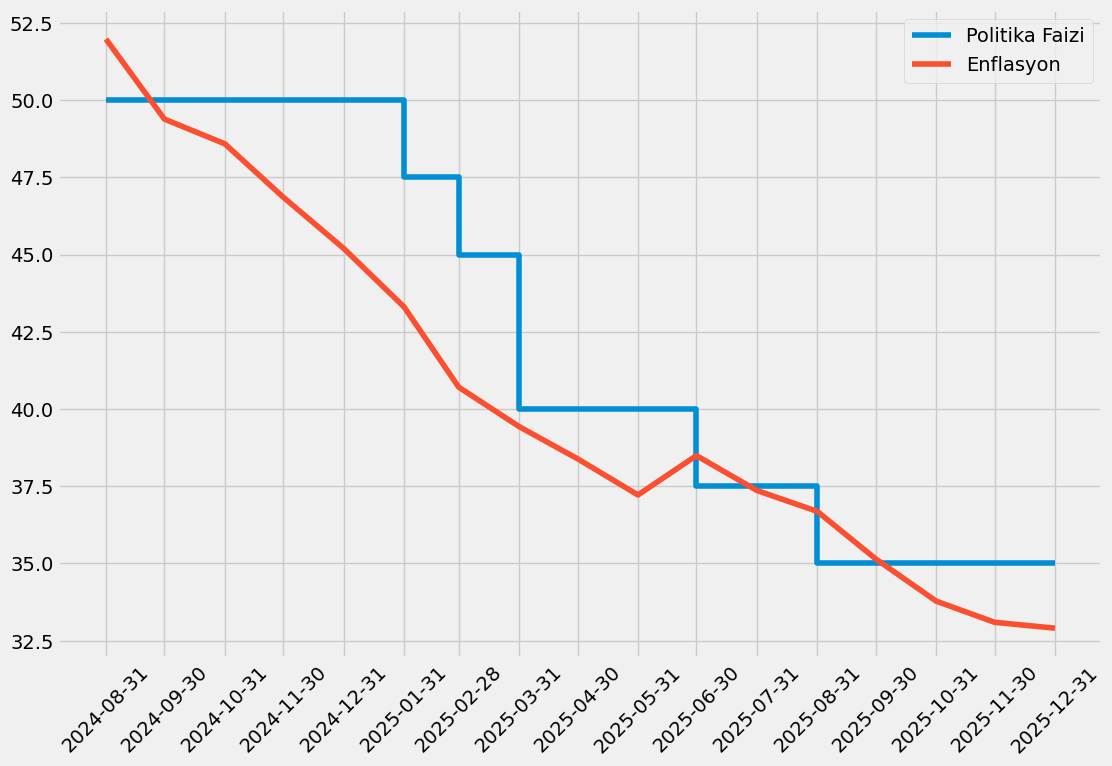

In [60]:
tahmin=tahmin.dropna()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.step(y=tahmin["Faiz"].dropna(),x=tahmin.dropna().index,where="post",label="Politika Faizi")
plt.plot(tahmin["Ortalama"],label="Enflasyon")
plt.xticks(tahmin.index,rotation=45)
plt.legend()

In [61]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [62]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2024-07-31,2738.228154
2024-08-31,2623.214664
2024-09-30,2457.059505
2024-10-31,2572.730439


In [63]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-04-30",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [64]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [65]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [66]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [67]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-10-31,8.525923
2024-11-30,8.486227
2024-12-31,8.486956
2025-01-31,8.494310
2025-02-28,8.509972
2025-03-31,8.557456
2025-04-30,8.554165
2025-05-31,8.552550
2025-06-30,8.576248
2025-07-31,8.575584


In [68]:
from prophet import Prophet

In [69]:
import optuna


In [70]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.50,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=usd.index
    sn["y"]=usd.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=500,freq="D")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(usd.values,predictions["yhat"][:-500])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.01, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.50,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=usd.index\n    sn["y"]=usd.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],sea

In [71]:
"""study.best_params"""

'study.best_params'

In [72]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=5.828175414699565,changepoint_range=0.6,seasonality_prior_scale=7.816953755754968,n_changepoints=100,interval_width=0.70,yearly_seasonality=False,weekly_seasonality="auto")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=500,freq="D")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:49:27 - cmdstanpy - INFO - Chain [1] start processing
18:49:27 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
usdtahmin=(predictions["yhat"].resample('M').mean().tail(19).pct_change()*100).dropna()
usdtahmin

ds
2024-11-30    1.177262
2024-12-31    0.620567
2025-01-31    1.194934
2025-02-28    1.123687
2025-03-31    1.111201
2025-04-30    1.136243
2025-05-31    1.123477
2025-06-30    1.110996
2025-07-31    1.098788
2025-08-31    1.104663
2025-09-30    1.074971
2025-10-31    1.063539
2025-11-30    1.052346
2025-12-31    1.041387
2026-01-31    1.047550
2026-02-28    0.986528
2026-03-31    0.976891
2026-04-30    0.737878
Freq: ME, Name: yhat, dtype: float64

In [74]:
usd_aylık=usd.resample('M').mean().dropna()

In [75]:
usdtahmin1 = []
result = usd_aylık.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd_aylık["USD/TL"].loc["2024-03-31":"2024-10-31"],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882
2024-06-30,32.521235
2024-07-31,32.894495
2024-08-31,33.621248
2024-09-30,34.030467
2024-10-31,34.232582
2024-11-30,34.821521
2024-12-31,35.037612


In [76]:
import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"][-13:],predictions["yhat"][-26:-13])
    return mae_score
"""study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

"study = optuna.create_study(direction='minimize')\nstudy.optimize(objective, n_trials=1000)"

In [77]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=0.95,changepoint_range=0.95,seasonality_prior_scale=5.378940289163559,n_changepoints=100)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:49:28 - cmdstanpy - INFO - Chain [1] start processing
18:49:28 - cmdstanpy - INFO - Chain [1] done processing


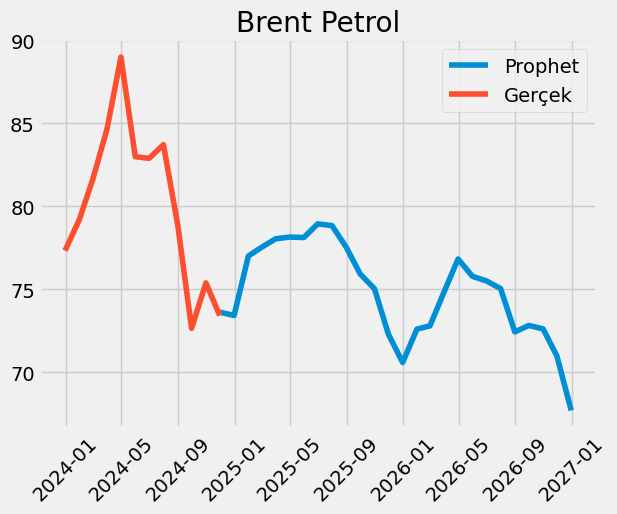

In [78]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [79]:
brenttahmin=predictions["yhat"].iloc[-29:]
brenttahmin

ds
2024-08-31    82.638580
2024-09-30    79.079894
2024-10-31    77.480616
2024-11-30    73.610476
2024-12-31    73.413528
2025-01-31    77.000863
2025-02-28    77.515634
2025-03-31    78.037778
2025-04-30    78.141653
2025-05-31    78.114725
2025-06-30    78.936909
2025-07-31    78.835134
2025-08-31    77.523014
2025-09-30    75.919525
2025-10-31    75.024140
2025-11-30    72.296819
2025-12-31    70.578124
2026-01-31    72.592122
2026-02-28    72.783908
2026-03-31    74.854151
2026-04-30    76.820381
2026-05-31    75.772934
2026-06-30    75.503166
2026-07-31    75.038753
2026-08-31    72.419942
2026-09-30    72.812301
2026-10-31    72.605678
2026-11-30    70.967307
2026-12-31    67.683226
Name: yhat, dtype: float64

In [80]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = o

18:49:29 - cmdstanpy - INFO - Chain [1] start processing
18:49:29 - cmdstanpy - INFO - Chain [1] done processing


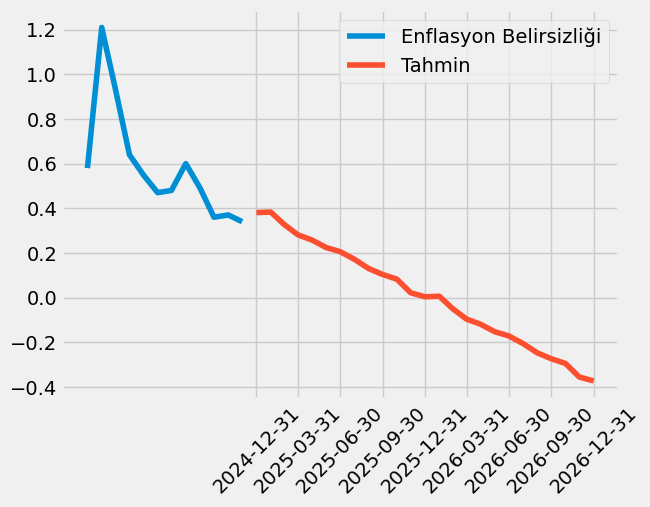

In [81]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=10,changepoint_range=0.82,seasonality_prior_scale=0.003403857042852,n_changepoints=6,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [82]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-11-30,0.340000
2024-12-31,0.380503
2025-01-31,0.383069
2025-02-28,0.329121
2025-03-31,0.280704
2025-04-30,0.258041
2025-05-31,0.223956
2025-06-30,0.205786
2025-07-31,0.171602


In [83]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [84]:
#study.best_params

In [85]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-09-30   -4.306326
2024-10-31   -2.022357
2024-11-30   -4.994978
2024-12-31   -0.267555
2025-01-31    4.886476
2025-02-28    0.668527
2025-03-31    0.673598
2025-04-30    0.133108
2025-05-31   -0.034461
2025-06-30    1.052534
2025-07-31   -0.128933
2025-08-31   -1.664384
2025-09-30   -2.068404
2025-10-31   -1.179387
2025-11-30   -3.635258
2025-12-31   -2.377276
2026-01-31    2.853573
2026-02-28    0.264197
2026-03-31    2.844369
2026-04-30    2.626747
2026-05-31   -1.363501
2026-06-30   -0.356021
2026-07-31   -0.615092
2026-08-31   -3.489945
2026-09-30    0.541784
2026-10-31   -0.283775
2026-11-30   -2.256533
2026-12-31   -4.627596
Name: yhat, dtype: float64

In [86]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[5:-1].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1.loc[:"2026-03-31"]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-09-30",periods=len(motorintahmin),freq="1M"))
motorintahmin=(motorintahmin-1)*100
motorintahmin

,Motorin
2024-09-30,-3.141596
2024-10-31,-1.440444
2024-11-30,-3.360507
2024-12-31,0.351352
2025-01-31,6.139801
2025-02-28,1.799727
2025-03-31,1.792284
2025-04-30,1.270864
2025-05-31,1.088630
2025-06-30,2.175224


In [87]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [88]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=0.904897796889,changepoint_range=0.9529543315216538,growth='linear',seasonality_prior_scale=3.03031163229546,n_changepoints=15)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:49:29 - cmdstanpy - INFO - Chain [1] start processing
18:49:29 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-12-31    2.569974
2025-01-31    1.058835
2025-02-28    1.370248
2025-03-31    3.028702
2025-04-30    2.533475
2025-05-31    2.102447
2025-06-30    2.480798
2025-07-31    1.638320
2025-08-31    1.845773
2025-09-30    1.693745
2025-10-31    1.318170
2025-11-30    1.357245
2025-12-31    2.117989
2026-01-31    0.208680
2026-02-28    0.762013
2026-03-31    2.153863
2026-04-30    1.100626
2026-05-31    1.304963
2026-06-30    1.912774
2026-07-31    0.588684
2026-08-31    1.723458
2026-09-30    0.504636
2026-10-31    0.053514
2026-11-30    0.334467
2026-12-31    1.672377
Name: yhat, dtype: float64

In [90]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-12-31", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-6:,0]},index=pd.date_range(start="2024-06-30",periods=6,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
np.cumprod(1+(paraarzitahmin1.loc["2024-01-31":"2024-12-31"])/100)

,Para Arzi
2024-06-30,1.030171
2024-07-31,1.055102
2024-08-31,1.095613
2024-09-30,1.115376
2024-10-31,1.123058
2024-11-30,1.139279
2024-12-31,1.168559


In [91]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [92]:
#study.best_params

In [93]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [94]:
"""study.best_params"""

'study.best_params'

In [95]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=0.01099759561372614,changepoint_range=0.0589785485153,growth="linear",seasonality_prior_scale=0.04157847860739,n_changepoints=10,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:49:30 - cmdstanpy - INFO - Chain [1] start processing
18:49:30 - cmdstanpy - INFO - Chain [1] done processing


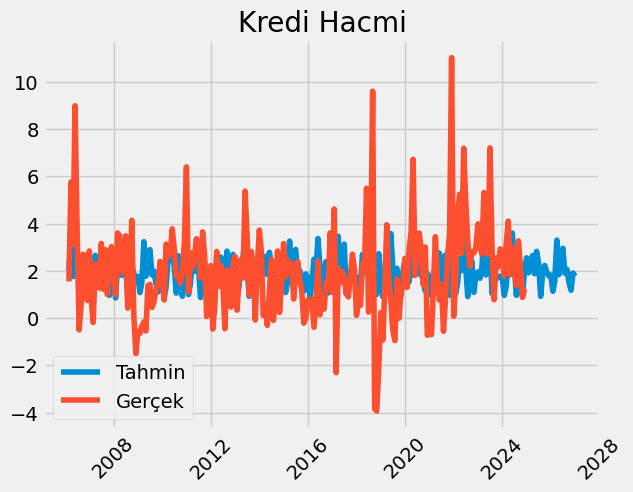

In [96]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [97]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-12-31    2.553762
2025-01-31    1.922188
2025-02-28    2.330367
2025-03-31    2.655119
2025-04-30    1.881552
2025-05-31    2.831464
2025-06-30    2.320493
2025-07-31    0.924997
2025-08-31    1.926817
2025-09-30    2.231852
2025-10-31    1.951439
2025-11-30    1.783984
2025-12-31    1.828171
2026-01-31    1.139225
2026-02-28    1.562436
2026-03-31    3.305819
2026-04-30    1.840859
2026-05-31    2.640846
2026-06-30    2.962411
2026-07-31    1.900898
2026-08-31    2.062276
2026-09-30    1.512475
2026-10-31    1.182735
2026-11-30    1.913835
2026-12-31    1.779185
Name: yhat, dtype: float64

In [98]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-12-31", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-08-31",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-08-31,3.273182
2024-09-30,2.186080
2024-10-31,0.878469
2024-11-30,1.250100
2024-12-31,2.553762
2025-01-31,1.922188
2025-02-28,2.330367
2025-03-31,2.655119
2025-04-30,1.881552
2025-05-31,2.831464


In [99]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [100]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=2.5,changepoint_range=0.9,growth='linear',seasonality_prior_scale=4.7636997959024185,n_changepoints=10)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=18,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

18:49:30 - cmdstanpy - INFO - Chain [1] start processing
18:49:30 - cmdstanpy - INFO - Chain [1] done processing


In [101]:
m3tahmin=(predictions["yhat"].tail(18))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-12-31", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-08-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-08-31,4.341284
2024-09-30,2.815464
2024-10-31,1.580657
2024-11-30,1.281700
2024-12-31,2.073019
2025-01-31,1.066766
2025-02-28,1.520662
2025-03-31,2.924139
2025-04-30,2.458989
2025-05-31,2.323706


In [102]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [103]:
#study.best_params

In [104]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [105]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1["M3"].shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.rolling(3).mean()
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].shift(1).rolling(2).mean()
tahmindf["Kredi2"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"].rolling(2).mean()
tahmindf["Motorin2"]=motorintahmin["Motorin"]
tahmindf["İşsizlik"]=issizliktahmin





tahmindf=tahmindf[['USD/TL', 'Motorin','Motorin2', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi','Kredi2','İşsizlik']]

tahmindf.columns=["USD/TL","Motorin","Motorin2","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi','Kredi2','İşsizlik']
tahmindf=tahmindf.loc["2024-11-30":]
enfbelirsizliktahmin=pd.read_excel("enfbelirsizliktahmin.xlsx")
enfbelirsizliktahmin=enfbelirsizliktahmin.set_index("Unnamed: 0")
enfbelirsizliktahmin=enfbelirsizliktahmin.loc["2024-09-30":]
enfbelirsizliktahmin=enfbelirsizliktahmin.set_index(pd.date_range(start="2024-10-31",freq="M",periods=len(enfbelirsizliktahmin)))

tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin["Series"]

tahmindf["USD/TL"].iloc[0]=data["USD/TL"].iloc[-1]
tahmindf["Motorin"].iloc[0]=data["Motorin"].iloc[-1]
tahmindf["ParaArzi"].iloc[0]=data["ParaArzi"].iloc[-1]
tahmindf["M3"].iloc[0]=data["M3"].iloc[-1]
tahmindf["Kredi"].iloc[0]=data["Kredi"].iloc[-1]
tahmindf["Enflasyon Belirsizliği"].iloc[0]=enf_belirsizlik.iloc[-1,0]
tahmindf["Zam"].iloc[-1]=0
tahmindf["Zam"].iloc[2]=37
tahmindf

,USD/TL,Motorin,Motorin2,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Kredi2,İşsizlik
2024-11-30,0.780397,0.994636,-3.360507,0.0,0.340000,1.312306,1.892607,1.532275,1.438216,8.486227
2024-12-31,0.977009,-1.504578,0.351352,0.0,0.328252,1.567716,1.281700,1.064285,1.560777,8.486956
2025-01-31,1.175604,3.245576,6.139801,37.0,0.525745,1.691070,2.073019,1.901931,1.908684,8.494310
2025-02-28,0.981039,3.969764,1.799727,0.0,0.410114,1.666352,1.066766,2.237975,2.268773,8.509972
2025-03-31,1.142951,1.796006,1.792284,0.0,0.301573,1.819262,1.520662,2.126278,2.302558,8.557456
2025-04-30,1.123757,1.531574,1.270864,0.0,0.308343,2.310808,2.924139,2.492743,2.289012,8.554165
2025-05-31,1.123685,1.179747,1.088630,0.0,0.287528,2.554875,2.458989,2.268335,2.456045,8.552550
2025-06-30,1.123477,1.631927,2.175224,0.0,0.359421,2.372240,2.323706,2.356508,2.344503,8.576248
2025-07-31,1.110996,1.571831,0.968439,0.0,0.381228,2.073855,2.389179,2.575978,2.025651,8.575584
2025-08-31,1.104792,0.195166,-0.578106,0.0,0.319732,1.988297,1.802703,1.622745,1.724102,8.598927


In [106]:
features=['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İhracat', 'İthalat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','Anket','ParaArzi','Zam', 'TÜFE']

data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data




,USD/TL,Motorin,M3,Enflasyon Belirsizliği,TÜFEt-1,Kredi,İhracat,İthalat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,Anket,ParaArzi,Zam,TÜFE
0,0.246927,0.047793,-0.281324,-0.547359,0.030842,0.799168,-0.569053,-1.380674,-0.959063,-0.383443,-0.912475,0.371987,-0.726327,-0.665140,-0.230758,-0.283969,-0.668846
1,0.074456,-0.364007,-0.809575,-0.935205,-0.666339,-0.294937,0.285592,-0.653826,-0.959063,0.372396,-0.713995,-0.289280,-0.540318,-0.695192,-0.696375,-0.283969,-0.355418
2,-1.083201,-0.994490,-1.213532,-0.754210,-0.352623,-0.970988,0.865976,1.092703,-0.829527,-0.288761,-0.528441,-0.510483,-0.305248,-0.612548,-1.087763,-0.283969,-0.256833
3,-1.239658,-0.857503,-1.358163,-0.676641,-0.253948,-1.098726,-0.702467,-0.013427,-0.829527,-0.509928,-0.293945,-0.732805,0.131384,-0.710219,-1.306717,-0.283969,-0.683663
4,-1.156445,-0.142125,-0.966934,-0.521503,-0.681169,-0.926769,0.038625,-0.049885,-0.829527,-0.732212,0.141620,-0.939994,-0.160508,-1.018255,-0.954376,-0.283969,-0.721608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.497875,0.434180,0.726169,0.202475,-0.120887,0.421137,-1.725754,-1.747012,-1.412438,-0.092620,0.916925,-0.291791,-0.054428,0.897584,0.069936,-0.283969,0.588329
126,-0.247445,0.247421,0.878005,-0.081945,0.591990,-0.065332,1.294471,1.677627,-1.541973,-0.291271,-0.043738,-0.098674,0.289710,0.732295,0.427515,-0.283969,0.250756
127,-0.211691,-0.742383,0.702705,-0.418077,0.254107,0.234990,-0.250980,-0.905919,-1.541973,-0.098187,0.299559,-0.188280,0.544860,0.484363,0.208402,-0.283969,0.472669
128,-0.270353,-0.465140,0.336054,-0.392221,0.476223,0.475842,-0.115852,-0.026777,-1.541973,-0.187539,0.554087,-0.295220,0.819999,0.612086,-0.104238,-0.283969,0.432971


In [107]:
"""import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
features=['M3','ParaArzi','Enflasyon Belirsizliği','Kredi','İşsizlik']
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    selected_features = ["USD/TL","Motorin","Zam"]
    for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)

    if len(selected_features) == 0:
        return float('inf')  # Hiçbir özellik seçilmezse, bu deneme geçersiz sayılır
    
    X=scaled_data[selected_features]
    y=scaled_data["TÜFE"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["TÜFE"])
    X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
    y_train,y_test=y[:-7],y[-7:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:])
    tahminler.loc["2024-05-31","Tahmin"]+=0.66
    tahminler.loc["2024-07-31","Tahmin"]+=0.67
    mse=mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["Tahmin"].iloc[:-1])


    return mse # Return validation accuracy as the objective

study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

'import optuna\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN\nimport keras\nfrom keras.callbacks import EarlyStopping\nfrom keras import regularizers\nfrom keras.layers import LSTM, Dense, Dropout\nfrom keras.regularizers import l2,l1\nfeatures=[\'M3\',\'ParaArzi\',\'Enflasyon Belirsizliği\',\'Kredi\',\'İşsizlik\']\ndef weighted_mse(y_true, y_pred):\n    n = len(y_true)\n    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar\n    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)\n    mse = np.sum(weights * (y_true - y_pred) ** 2) / n\n    return mse\ndef objective(trial):\n    # Define hyperparameters to be optimized\n    selected_features = ["USD/TL","Motorin","Zam"]\n    for feature in features:\n        if trial.suggest_categorical(feature, (True, False)):\n            selected_features.append(feature)\n\n    if len(selected_features) == 0:\n        return float(\'i

In [108]:
features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin', 'Zam','ParaArzi','İşsizlik']

data1=data[features]
data1=pd.concat([data1,tahmindf[features]],axis=0)
data1["TÜFE"]=data["TÜFE"]
data1=data1.fillna(0)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))






In [109]:
trials=pd.read_excel("futuretrial4.xlsx")
del trials["Unnamed: 0"]
predictions=pd.DataFrame()
for i in range(10):
    trial=trials.iloc[i:i+1]
    selected_features=['Enflasyon Belirsizliği', 'Kredi2', 'USD/TL', 'Motorin', 'Zam','ParaArzi','İşsizlik']






    

    X = scaled_data[selected_features]
    y = scaled_data["TÜFE"]
    
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    
    X = pd.DataFrame(X, columns=selected_features)
    y = pd.DataFrame(y, columns=["TÜFE"])
    
    X_train, X_test = X.iloc[:-27, :], X.iloc[-18:, :]
    y_train, y_test = y[:-27], y[-18:]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    



    units=int(trial["params_units1"].values[0])
    activation=trial["params_activation1"].values[0]
    rl=trial["params_rlrate"].values[0]
    lr=trial["params_learning_rate"].values[0]
    batch=int(trial["params_batch_size"].values[0])
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    """model = Sequential()   
    model.add(Dense(units=units,activation=activation,input_dim=(X_train.shape[1])))
    model.add(Dropout(rl))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=batch,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))"""
    model = keras.models.load_model(f"future_{i}.keras")
   


    pred=scaler2.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["TÜFE"]
    pred=pred.set_index(pd.date_range(start="2024-11-30",periods=len(tahmindf),freq="1M"))
    pred.iloc[0]=kısatahminler["Ortalama"].iloc[-1]
    predictions=pd.concat([predictions,pred["TÜFE"]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [110]:
def create_tüfe(data):
    tüfetahmin = []
    result = enf["TÜFE"].iloc[-1]
    pred=np.array(data.values).reshape(1,-1).ravel()
    for i in range(len(pred)):
        result *= (1 + (pred[i] / 100))
        tüfetahmin.append(result)
    tüfetahmin[0]=enf["TÜFE"].iloc[-1]*(1+(data[0]/100))

    tüfetahmin = np.array(tüfetahmin).reshape(-1, 1)
    tüfetahmin = pd.DataFrame(tüfetahmin)
    tüfetahmin = tüfetahmin.set_index(pd.date_range(start="2024-11-30", periods=len(tüfetahmin), freq="1M"))
    return tüfetahmin


In [111]:
tüfetahmin_dict={}
for i in range(len(predictions.columns)):
    # Dinamik olarak bir sözlük içinde tahminleri saklıyoruz.
    tüfetahmin_dict[f"tüfetahmin_{i}"] = create_tüfe(predictions.iloc[:, i])
    # Kolon adını güncelleme
    tüfetahmin_dict[f"tüfetahmin_{i}"].columns = [f"NN_{i}"]



tüfetahmin=pd.concat(tüfetahmin_dict.values(), axis=1)
std=tüfetahmin.std(axis=1)
predictions.columns=tüfetahmin.columns

In [112]:
predictions=predictions.drop("NN_1",axis=1)
predictions=predictions.drop("NN_9",axis=1)
predictions=predictions.drop("NN_7",axis=1)

tüfetahmin=tüfetahmin.drop("NN_1",axis=1)
tüfetahmin=tüfetahmin.drop("NN_9",axis=1)
tüfetahmin=tüfetahmin.drop("NN_7",axis=1)

In [113]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))


std=tüfetahmin.std(axis=1)

dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.mean(axis=1)],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=["Ortalama"]


dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.max(axis=1)+(0.5*std)],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=["Max"]

dfas3=pd.DataFrame()
dfas3=pd.concat([df["CPI"],tüfetahmin.min(axis=1)],axis=0)
dfas3=pd.DataFrame(dfas3)
dfas3.columns=["Min"]
dfas3["Min"].loc["2024-11-30":]-=(std.loc["2024-11-30":])

dfas0=pd.DataFrame()
for i in range(tüfetahmin.shape[1]):
    dfas00=pd.DataFrame()
    dfas00=pd.concat([df["CPI"],tüfetahmin.iloc[:,i]],axis=0)
    dfas00=pd.DataFrame(dfas00)
    dfas00.columns=[f"NN_{i}"]
    dfas0=pd.concat([dfas0,dfas00],axis=1)



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas0],axis=1)
dfas=dfas.dropna(axis=0)

dfas["Ortalama"]=dfas.mean(axis=1)
dfas["Max"]=dfas2["Max"]
dfas["Min"]=dfas3["Min"]
dfas=dfas.pct_change(periods=12)*100
df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)







In [114]:
dfas["Ortalama"].to_excel("tüfetahmin.xlsx",index=True)

In [115]:

predictions["Ortalama"]=predictions.mean(axis=1)

In [116]:
std=predictions.iloc[:,:-1].std(axis=1)

In [117]:
sonu12024=str(dfas["Ortalama"].loc["2024-12-31"])[:5]
min2024=str(dfas["Min"].loc["2024-12-31"]-1)[:5]
max2024=str(dfas["Max"].loc["2024-12-31"]+1)[:5]

In [118]:
min2025=str(dfas["Min"].loc["2025-12-31"]-1)[:5]
max2025=str(dfas["Max"].loc["2025-12-31"]+1)[:5]

In [119]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-11-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-10-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-10-31,44.81


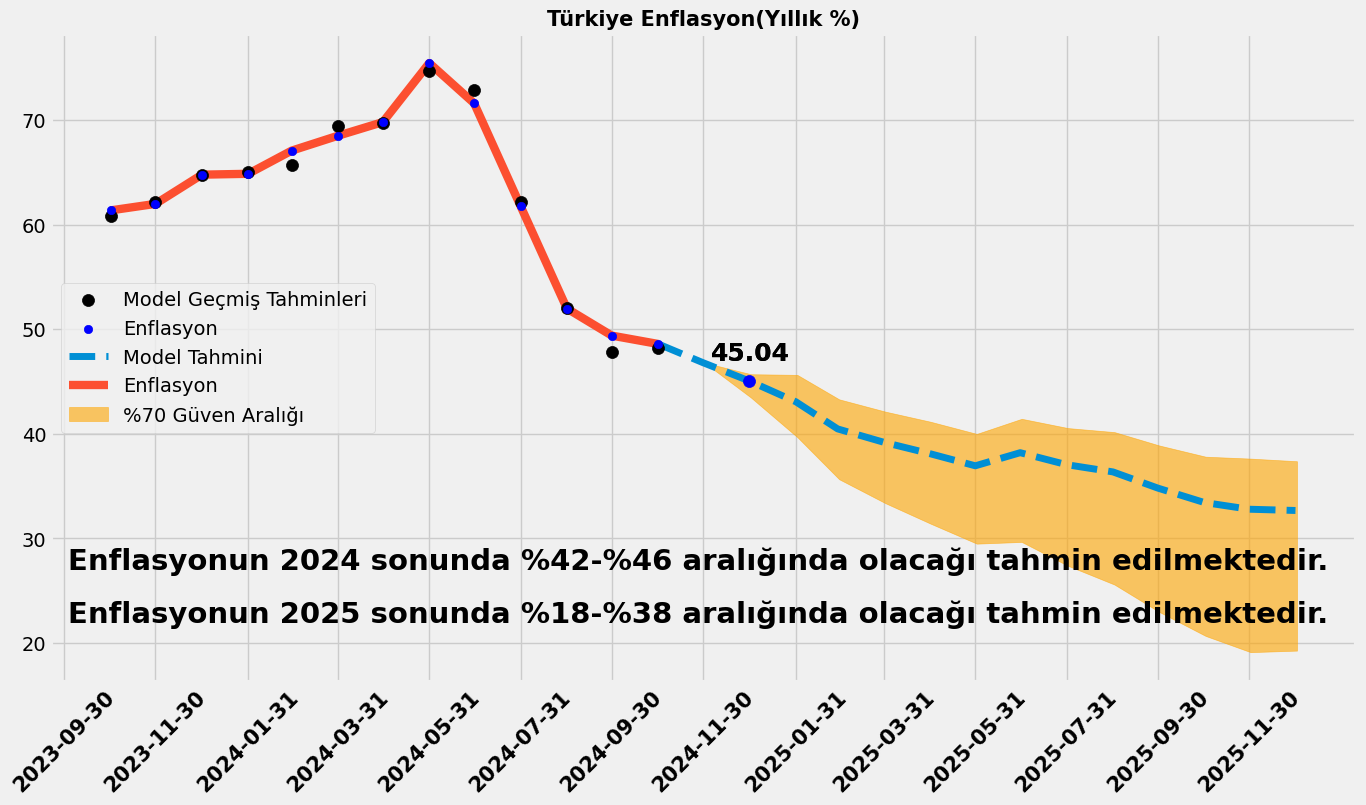

In [120]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65,72.87,62.17,52.07,47.82,48.20]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",periods=len(geçmiş),freq="M"))
plt.scatter(x=geçmiş["Tahmin"].loc["2023-10-31":].index,y=geçmiş["Tahmin"].loc["2023-10-31":],label="Model Geçmiş Tahminleri",color="black",zorder=3,s=75)
plt.scatter(x=dfas["Ortalama"].loc["2023-10-31":"2024-10-31"].index,y=dfas["Ortalama"].loc["2023-10-31":"2024-10-31"],label="Enflasyon",color="blue",zorder=3)
plt.scatter(x=dfas.loc["2024-12-31":].index[0],y=dfas["Ortalama"].loc["2024-12-31"],color='blue',zorder=4,s=75)
plt.plot(dfas["Ortalama"].loc["2024-10-31":"2025-12-31"],'--',label="Model Tahmini",linewidth=5)
plt.plot(dfas["Ortalama"].loc["2023-10-31":"2024-10-31"],label="Enflasyon",linewidth=6)
plt.fill_between(dfas.loc["2024-11-30":"2026-01-31"].index.strftime("%Y-%m"), dfas["Max"].loc["2024-11-30":"2026-01-31"].shift(1), dfas["Min"].loc["2024-11-30":"2026-01-31"].shift(1), alpha=0.6, color='orange',label="%70 Güven Aralığı")
annotation_date = mdates.datestr2num('2024-11')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 27, f"Enflasyonun 2024 sonunda %{min2024[:2]}-%{max2024[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='center',fontweight='bold')

annotation_date = mdates.datestr2num('2024-11')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 22, f"Enflasyonun 2025 sonunda %{min2025[:2]}-%{max2025[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='center',fontweight='bold')

plt.xticks(dfas.loc["2023-09-30":"2025-12-31"].index[::2],rotation=45,fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=6)
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./forecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

In [121]:
modelaylık=kısatahminler.iloc[-1:,1:-2]
modelaylık["Ortalama"]=kısatahminler["Ortalama"].iloc[-1]
modelaylık["Ensemble"]=kısatahminler["Ensemble"].iloc[-1]
modelaylık

,NN1,NN2,NN3,NN4,NN5,Ortalama,Ensemble
2024-11-30,1.990754,2.041348,2.109288,2.240953,1.801773,2.036823,2.031173


In [122]:
predictions["Max"]=predictions.max(axis=1)+std
predictions["Min"]=predictions.min(axis=1)-(0.5*std)
predictions["Max"].iloc[0]=modelaylık.iloc[:,:-2].max(axis=1)+modelaylık.iloc[:,:-2].std(axis=1)
predictions["Min"].iloc[0]=modelaylık.iloc[:,:-2].min(axis=1)-modelaylık.iloc[:,:-2].std(axis=1)


In [123]:

aylık=pd.concat([data["TÜFE"][:-1],predictions["Ortalama"]],axis=0)
aylık=pd.DataFrame(aylık)
aylık.columns=["Aylık"]
aylık["Max"]=predictions["Max"]
aylık["Min"]=predictions["Min"]
predictions=predictions.set_index(aylık.loc["2024-11-30":"2026-04-30"].index)
aylık

,Aylık,Max,Min
2014-02-28,0.428192,NaN,NaN
2014-03-31,1.125608,NaN,NaN
2014-04-30,1.344970,NaN,NaN
2014-05-31,0.395224,NaN,NaN
2014-06-30,0.310791,NaN,NaN
...,...,...,...
2025-12-31,1.600805,2.132474,0.875274
2026-01-31,3.561926,4.854184,2.640615
2026-02-28,1.758927,2.475510,0.745860
2026-03-31,1.708356,2.363505,0.894085


In [124]:
aylık.to_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv")

In [125]:
modelaylık.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [126]:
yıllıktahmin1=dfas


yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04'),
  Text(8, 0, '2024-05'),
  Text(9, 0, '2024-06'),
  Text(10, 0, '2024-07'),
  Text(11, 0, '2024-08'),
  Text(12, 0, '2024-09'),
  Text(13, 0, '2024-10')])

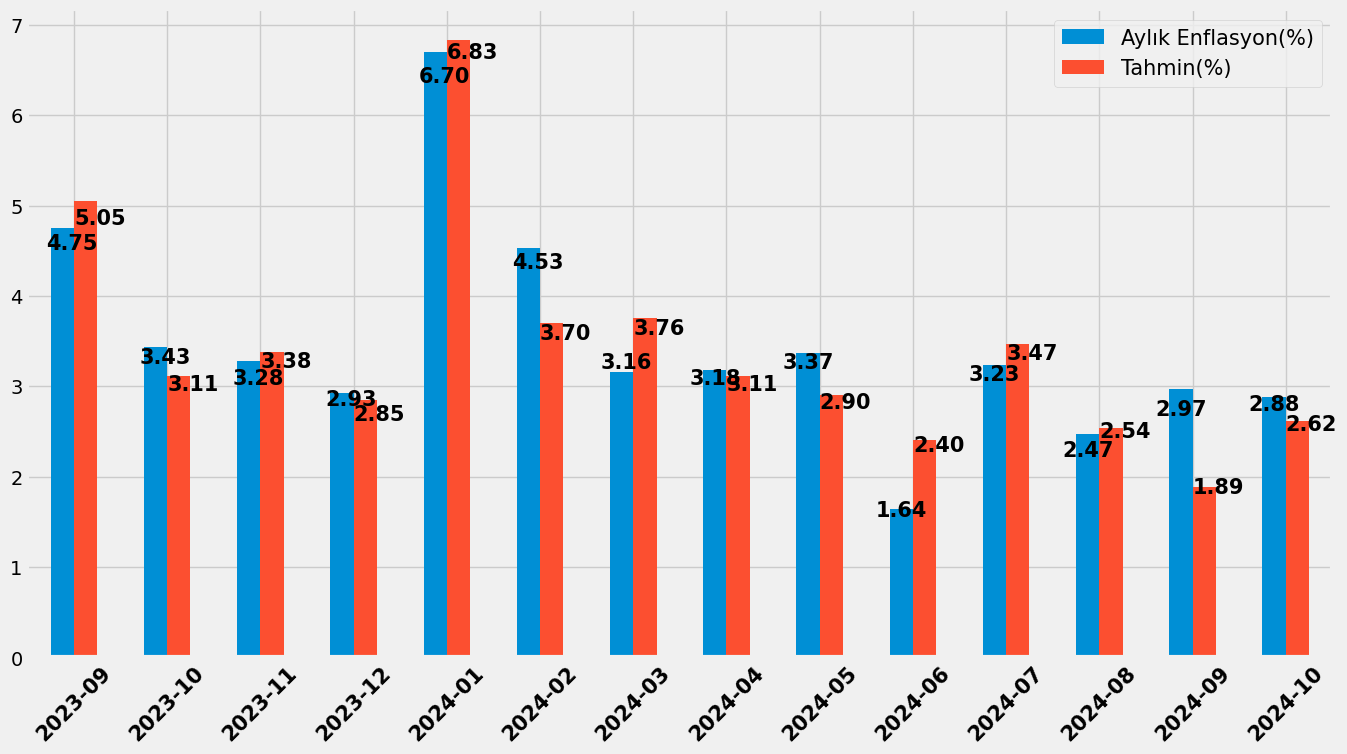

In [127]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18,3.37,1.64,3.23,2.47,2.97,2.88],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11,2.90,2.40,3.47,2.54,1.89,2.62]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=len(gecmis),freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(15,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.92),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.92),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.97),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.85),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.37",xy=(7.6,gecmis.iloc[8,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.90",xy=(8,gecmis.iloc[8,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("1.64",xy=(8.6,gecmis.iloc[9,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.40",xy=(9,gecmis.iloc[9,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.23",xy=(9.6,gecmis.iloc[10,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.47",xy=(10,gecmis.iloc[10,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.47",xy=(10.6,gecmis.iloc[11,0]*0.90),fontweight="bold",fontsize=15)
plt.annotate("2.54",xy=(11,gecmis.iloc[11,1]*0.96),fontweight="bold",fontsize=15)
plt.annotate("2.97",xy=(11.6,gecmis.iloc[12,0]*0.90),fontweight="bold",fontsize=15)
plt.annotate("1.89",xy=(12,gecmis.iloc[12,1]*0.96),fontweight="bold",fontsize=15)
plt.annotate("2.88",xy=(12.6,gecmis.iloc[13,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.62",xy=(13,gecmis.iloc[13,1]*0.96),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=45,fontweight="bold",fontsize=15,color="black")

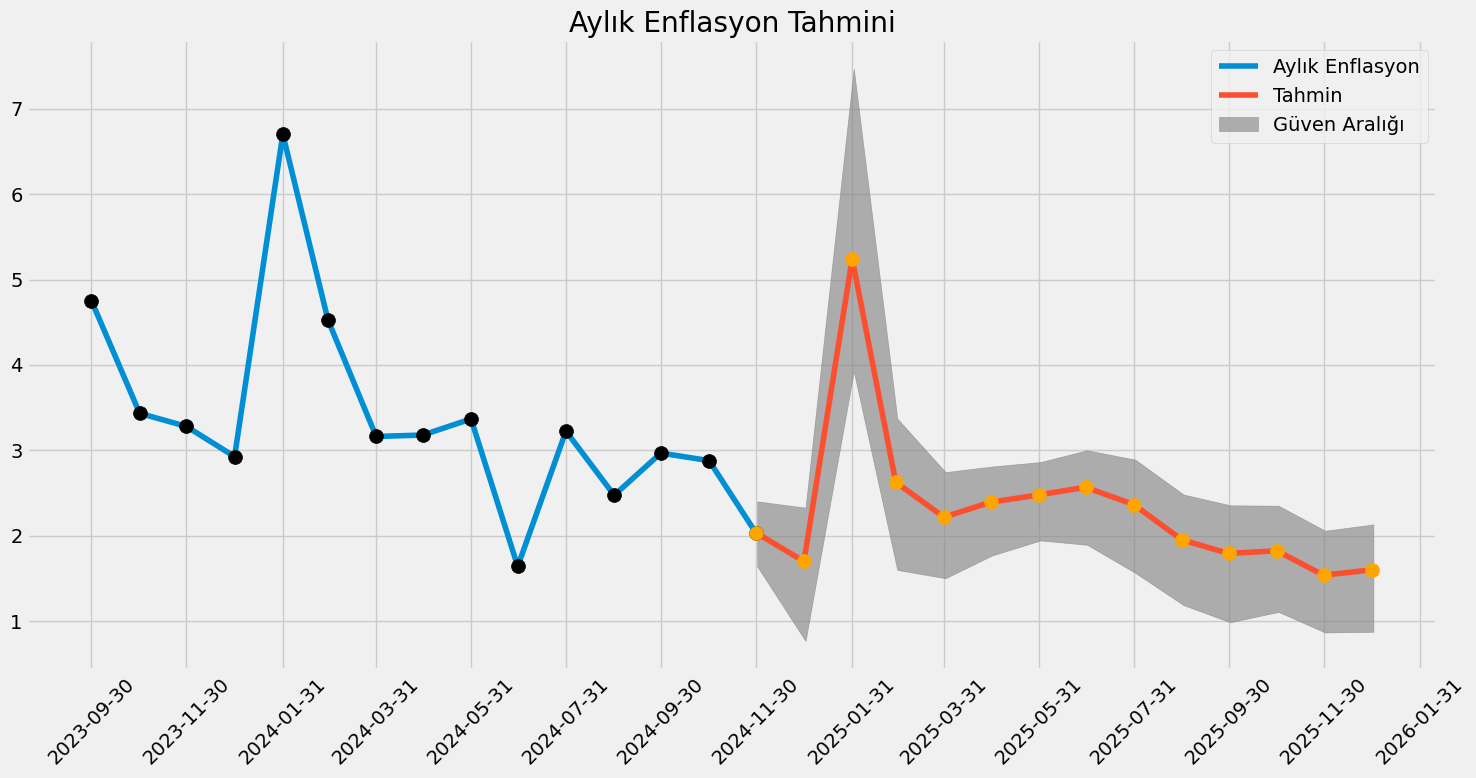

In [128]:
plt.figure(figsize=(15,8))
plt.title("Aylık Enflasyon Tahmini")
plt.plot(aylık["Aylık"].loc["2023-09-30":"2024-11-30"],label="Aylık Enflasyon")
plt.plot(predictions["Ortalama"].loc["2024-11-30":"2025-12-31"],label="Tahmin")
plt.scatter(x=aylık.loc["2023-09-30":"2024-11-30"].index,y=aylık["Aylık"].loc["2023-09-30":"2024-11-30"],color="black",s=100,zorder=3)
plt.scatter(x=predictions["Ortalama"].loc["2024-11-30":"2025-12-31"].index,y=predictions["Ortalama"].loc["2024-11-30":"2025-12-31"],color="orange",s=100,zorder=3)
plt.fill_between(predictions.loc["2024-11-30":"2026-01-31"].index.strftime("%Y-%m"), predictions["Max"].loc["2024-11-30":"2026-01-31"].shift(1), predictions["Min"].loc["2024-11-30":"2026-01-31"].shift(1), alpha=0.6, color='gray',label="Güven Aralığı")

plt.xticks(aylık.loc["2023-09-30":].index[:-3:2],rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("./monthlyCIforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

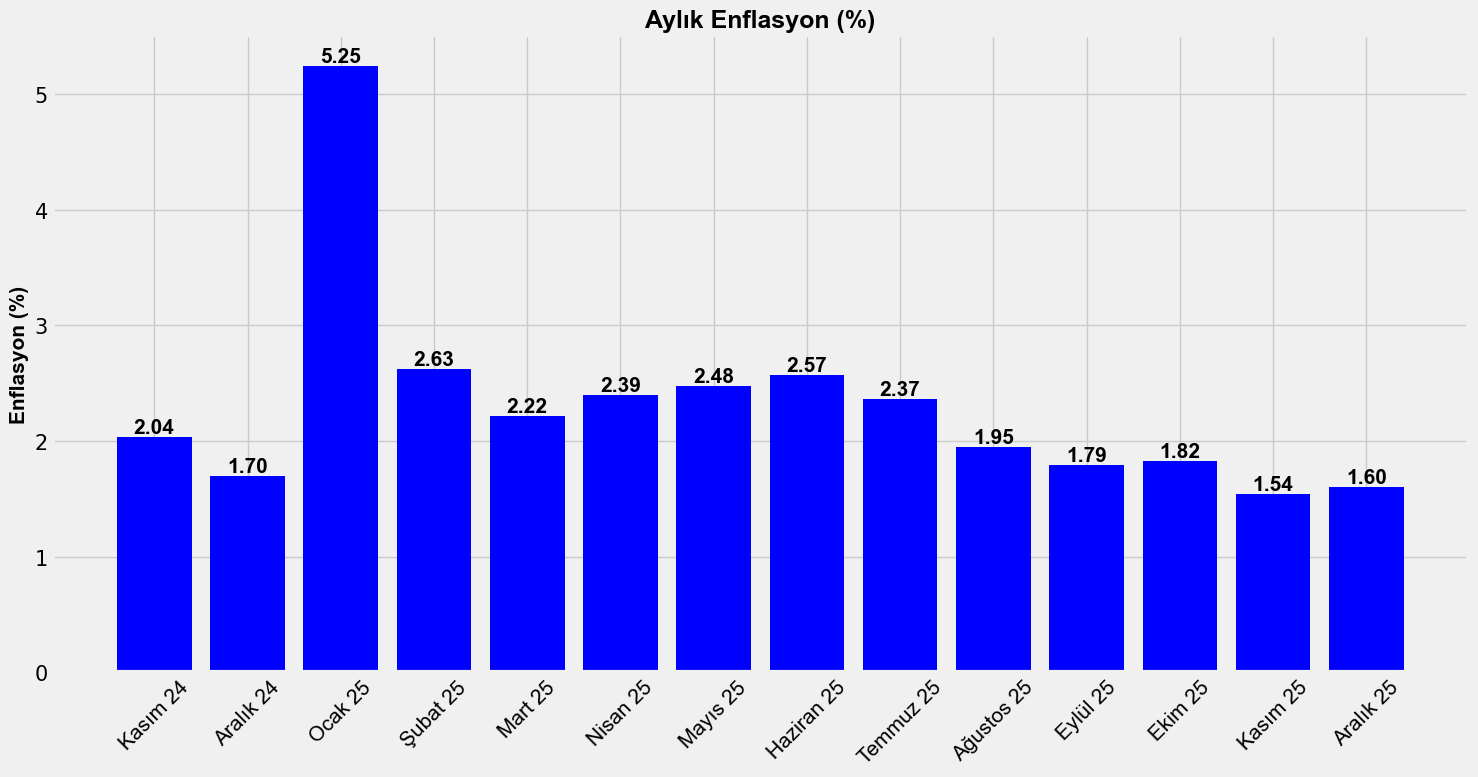

In [129]:

turkish_months = [  "Kasım 24", "Aralık 24", "Ocak 25", "Şubat 25",
    "Mart 25", "Nisan 25", "Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    aylık["Aylık"].loc["2024-11-30":"2025-12-31"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, aylık["Aylık"].loc["2024-11-30":"2025-12-31"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Aylık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig("./monthlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

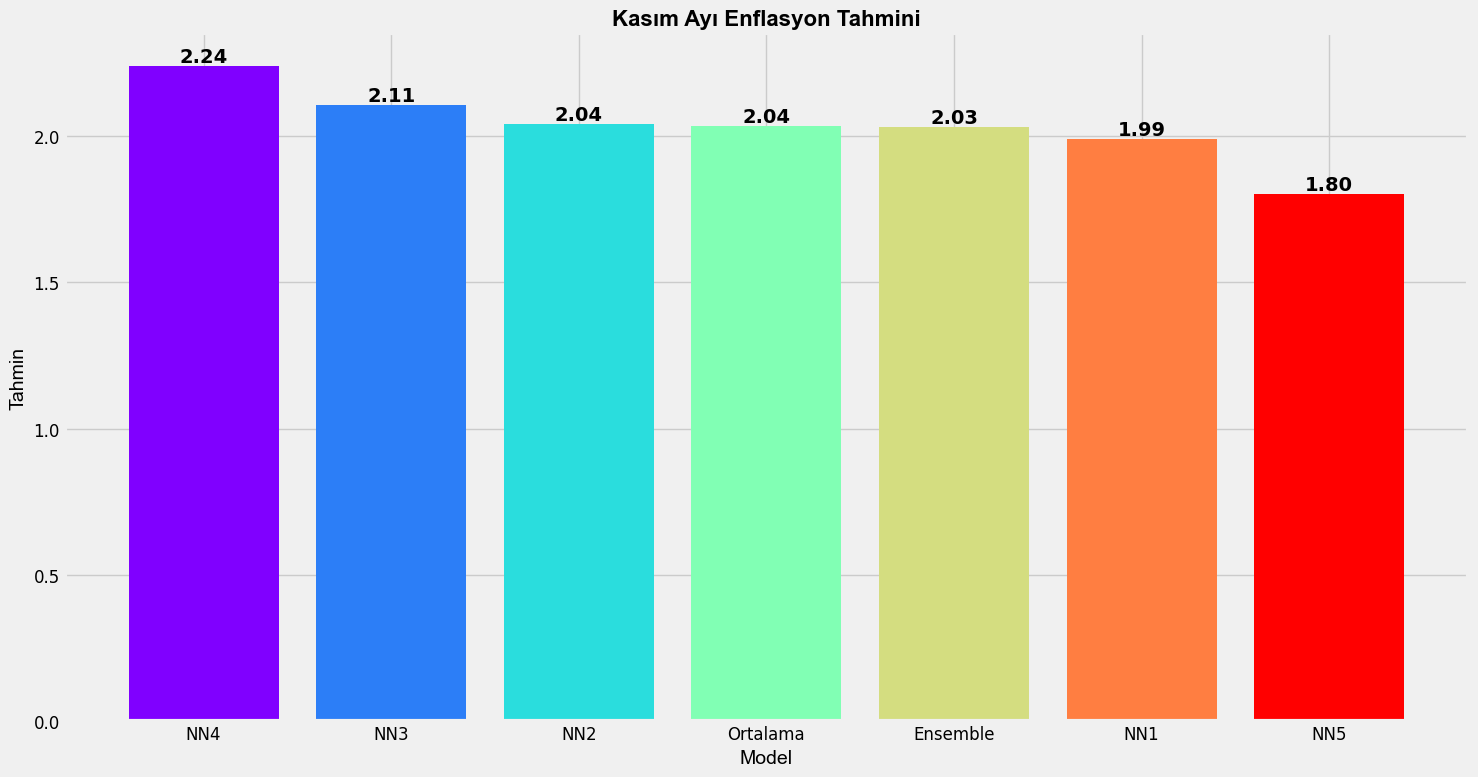

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

sorted_index = modelaylık.iloc[0, :].sort_values(ascending=False).index
sorted_modelaylık = modelaylık[sorted_index]

# Renk haritasını oluştur (Viridis yerine Rainbow kullanılacak)
colors = cm.rainbow(np.linspace(0, 1, len(sorted_modelaylık.columns)))

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))

bars = ax.bar(
    sorted_modelaylık.columns,  # X ekseni
    sorted_modelaylık.iloc[0, :].values,  # Y ekseni
    color=colors  # Renk haritası
)

# Çubukların üzerine metin yerleştirme
for bar, value in zip(bars, sorted_modelaylık.iloc[0, :].values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu
        bar.get_height(),  # Y pozisyonu
        f'{value:.2f}',  # Yazılacak metin
        ha='center',  # Ortala
        va='bottom',  # Çubuğun üstüne yerleştir
        fontsize=14,
        color="black",
        fontweight="bold"
    )

# Başlık ve etiketler
ax.set_title("Kasım Ayı Enflasyon Tahmini", fontsize=16, fontweight='bold', fontfamily="Arial", color="black")
ax.set_ylabel("Tahmin", fontsize=14, fontfamily="Arial", color="black")
ax.set_xlabel("Model", fontsize=14, fontfamily="Arial", color="black")

# Eksendeki yazı tiplerini ayarlama
ax.tick_params(axis='x', labelsize=12, colors="black", labelrotation=0)
ax.tick_params(axis='y', labelsize=12, colors="black")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig("./monthlymodelforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')


plt.show()

In [131]:
import pandas as pd
from datetime import datetime

# CSV dosyasını oku
csv_file = "C:/Users/Bora/Documents/GitHub/streamlit-inflation/cariay.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = kısatahminler["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = new_tahmin
except:
    pass
df=df.loc["2024-11-05":]
df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2024-11-27 tarihli tahmin başarıyla eklendi.


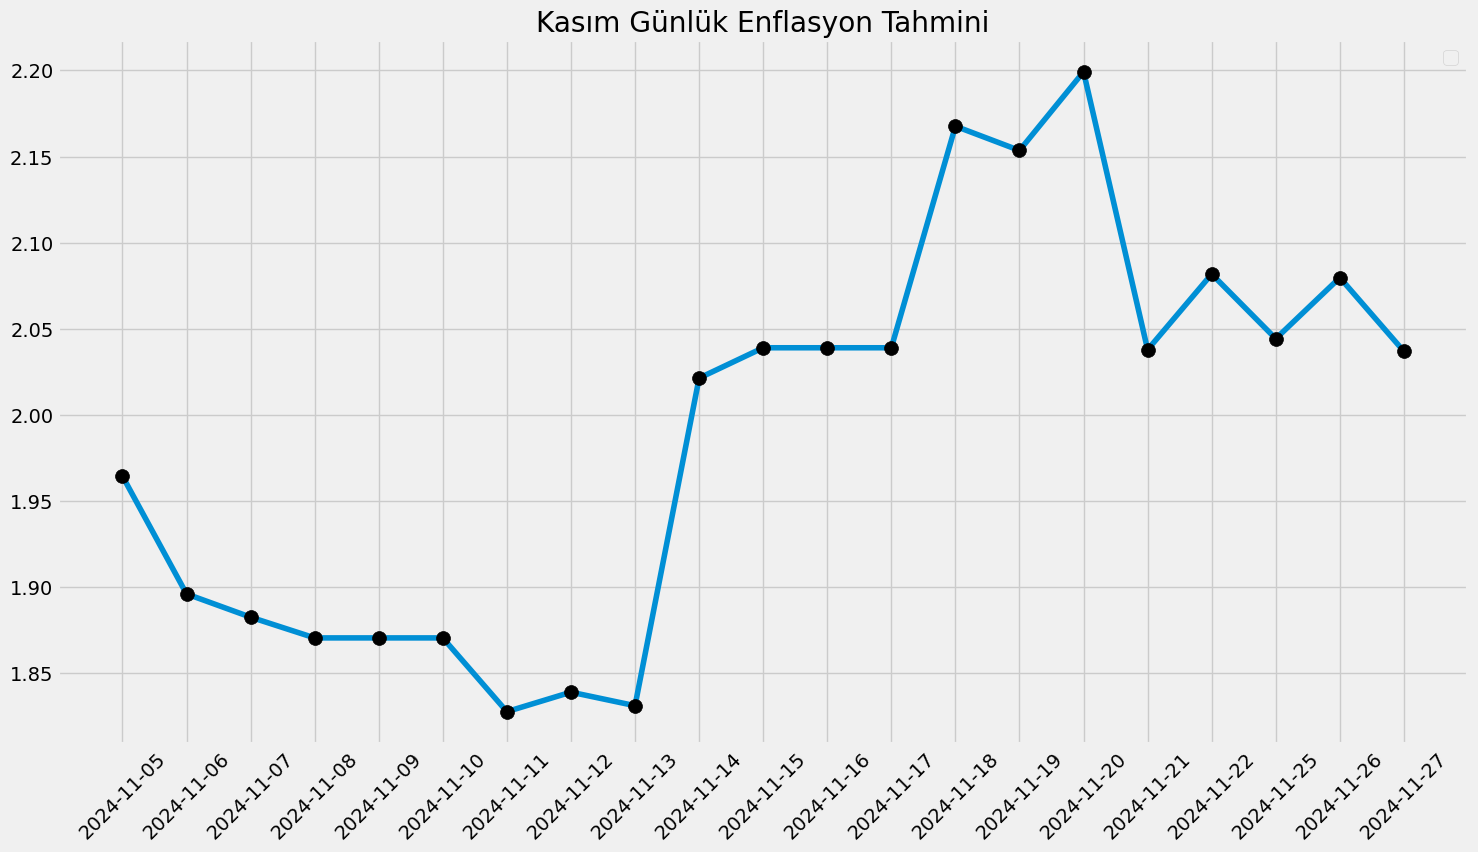

In [132]:
import matplotlib.pyplot as plt
from datetime import date
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Kasım Günlük Enflasyon Tahmini")
plt.plot(df)
plt.scatter(x=df.index,y=df["Tahmin"],color="black",s=100,zorder=3)
plt.legend()
plt.tight_layout()
plt.xticks(df.index,rotation=45)
plt.savefig("./dailyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

In [134]:
predictions

,NN_0,NN_2,NN_3,NN_4,NN_5,NN_6,NN_8,Ortalama,Max,Min
2024-11-30,2.036823,2.036823,2.036823,2.036823,2.036823,2.036823,2.036823,2.036823,2.402440,1.640286
2024-12-31,0.941126,1.732829,1.912348,1.799491,1.701165,1.831388,1.980452,1.699828,2.328751,0.766976
2025-01-31,4.517132,4.339929,5.079540,5.707757,6.642279,5.736554,4.694353,5.245363,7.467677,3.927230
2025-02-28,1.792325,2.693815,2.801697,2.782100,2.721136,2.608139,2.985724,2.626419,3.371647,1.599364
2025-03-31,1.638226,2.254288,2.349480,2.357893,2.211920,2.241219,2.474417,2.218206,2.745414,1.502727
2025-04-30,1.887155,2.416162,2.520608,2.548493,2.385760,2.418690,2.576107,2.393282,2.811025,1.769696
2025-05-31,2.047959,2.493525,2.606587,2.657451,2.430464,2.511961,2.602204,2.478593,2.862695,1.945337
2025-06-30,2.020082,2.587858,2.716458,2.722315,2.578783,2.602914,2.749011,2.568203,3.000858,1.894158
2025-07-31,1.713601,2.379340,2.530283,2.506866,2.426275,2.407217,2.593647,2.365318,2.890796,1.565027
2025-08-31,1.330386,1.944086,2.112352,2.067179,1.988490,2.020547,2.196389,1.951347,2.482512,1.187325


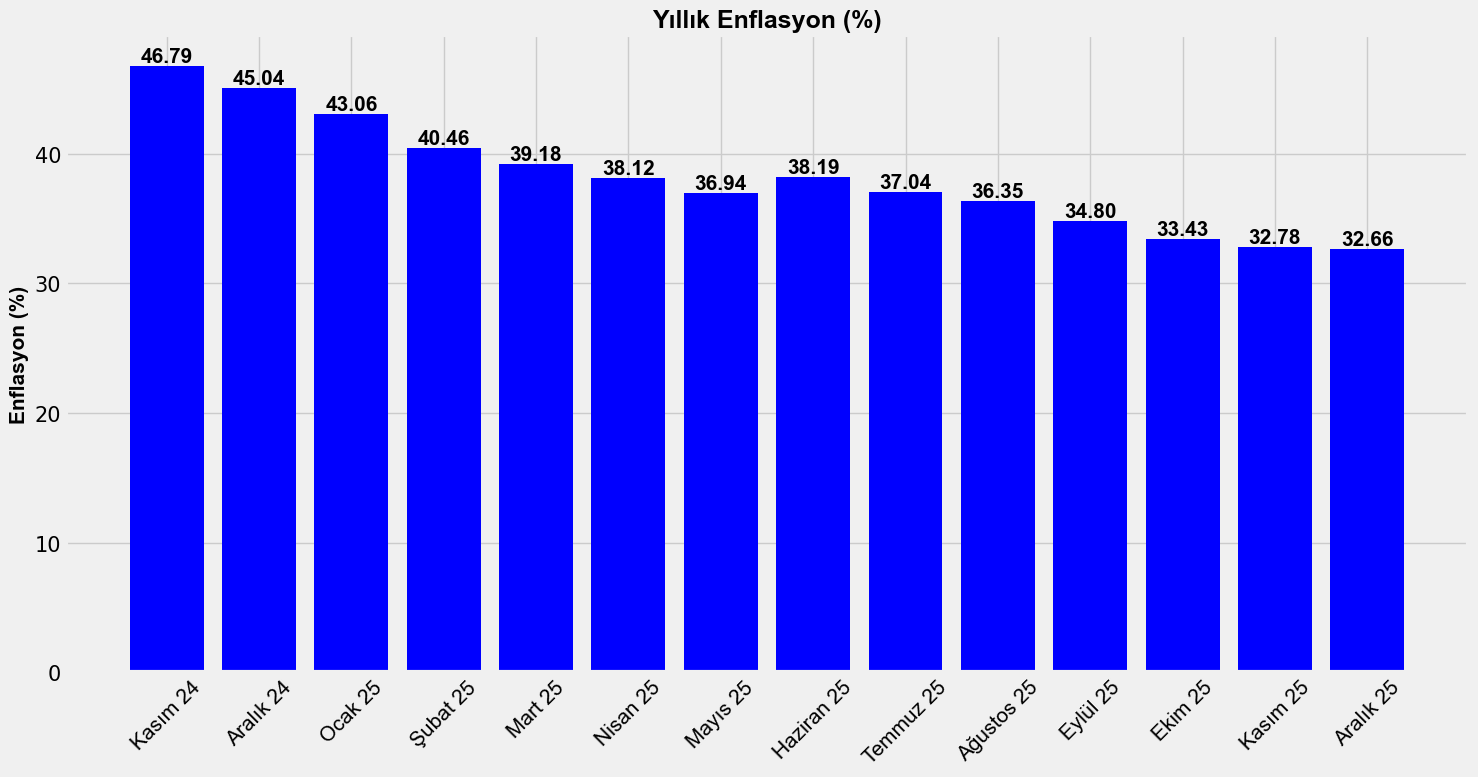

In [133]:

turkish_months = ["Kasım 24", "Aralık 24", "Ocak 25", "Şubat 25",
    "Mart 25", "Nisan 25", "Mayıs 25", "Haziran 25", "Temmuz 25", "Ağustos 25",
    "Eylül 25", "Ekim 25", "Kasım 25", "Aralık 25"
]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(
    turkish_months,
    yıllıktahmin1["Ortalama"].loc["2024-11-30":"2025-12-31"],
    color='blue'
)

# Barların üstüne değerleri yazma
for bar, value in zip(bars, yıllıktahmin1["Ortalama"].loc["2024-11-30":"2025-12-31"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X pozisyonu (barın ortası)
        bar.get_height(),  # Y pozisyonu (barın yüksekliği)
        f'{value:.2f}',  # Yazılacak metin (2 ondalık basamak)
        ha='center',  # Metni ortala
        va='bottom',  # Barın üst kısmına yerleştir
        fontsize=15,
        fontweight='bold',
        color='black',
        family="Arial"
    )

# X ekseni ayarları
ax.set_xticks(np.arange(len(turkish_months)))
ax.set_xticklabels(turkish_months, rotation=45, fontsize=15, color="black", fontfamily="Arial")

# Y ekseni ayarları
ax.set_ylabel("Enflasyon (%)", fontsize=15, fontweight='bold', color="black", fontfamily="Arial")
ax.tick_params(axis='y', labelsize=15, labelcolor='black')

# Başlık
ax.set_title("Yıllık Enflasyon (%)", fontsize=18, fontweight='bold', color="black", fontfamily="Arial")

# Grafik düzenlemesi
plt.tight_layout()
plt.savefig('forecast.png', bbox_inches='tight')
plt.savefig("./yearlyforecasts/" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()